## Installations

In [ ]:
!pip install python-bidi # wordcloud

!pip install googletrans==4.0.0-rc1

!pip install lemminflect # lemmatizer

!pip install vaderSentiment # english sentiment analyser

!pip install spacy

!pip install NRCLex  # Emotion classification using NRC Lexicon

# plolty - visualization tools
!pip install dash
!pip install chart_studio
!pip install plotly --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17413 sha256=2949f3514c6f77697d0c1e0bba1ea65bb6f204ffa9b7a2caeeada4478b6895fa
  Stored in directory: /root/.cache/pi

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Output display format

In [ ]:
#C hange output dispay
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 16px;
      direction: rtl;
      text-align: right;

    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

## Imports

In [ ]:
# google authentication for importing files from drive
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

import textwrap # text wrapping for better aesthetics when text is displayed

 # google translate API
import googletrans
from googletrans import Translator
translator = Translator()

# word cloud tools
from wordcloud import WordCloud
from bidi.algorithm import get_display
from PIL import Image,ImageDraw,ImageFont
from matplotlib import pyplot as plt

import pandas as pd # dataframe tool
import spacy
sp = spacy.load('en_core_web_sm')

import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk import ngrams # for bigrams

import lemminflect # lemmatizer

import re # regular expressions

# sentiment classifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

from nrclex import NRCLex # emotion classifier by NRC Word-Emotion Association Lexicon

# connect google drive to get file access
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [ ]:
#============================= PLOTLY - chart tool
#  https://chart-studio.plotly.com/
# username: transparentwomenproject
# email: transparentwomenproject2021@gmail.com
# password: project2021

from nltk.featstruct import retract_bindings
import chart_studio
chart_studio.tools.set_credentials_file(username='transparentwomenproject', api_key='z6Ljj30Lx4KOegjdqcVI')
chart_studio.tools.set_config_file(world_readable=True, sharing='public')

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px


## Data Extraction

In [ ]:
# load data
worksheet = gc.open('שאלון מחלות שקופות (תגובות)').sheet1
fibro_dictionary = gc.open('fibroTags').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
fibro_dictionary_rows = fibro_dictionary.get_all_values()

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)
df_list = df.values.tolist()
fibfo_list_he=[]
fibfo_list_en=[]
fibro_treatment_detail=[]
fibro_additionl_doctors=[]
fibro_information_sources=[]
fibro_additional_symptoms=[]
fibro_intensity_of_symptoms=[]
fibro_treatment_experience=[]
fibro_incorrect_diagnoses=[]
fibro_incorrect_treatment_details=[]
fibro_pesonal_experience=[]

#--------------------------------------------------------- MY CUSTOM FIBRO DICTIONARY
df_dictionary = pd.DataFrame.from_records(fibro_dictionary_rows)
df_list_dictionary = df_dictionary.values.tolist()

#----------------------------------The questions:
# for x in range(0, 77):
#   print(f'The index is {x}')
#   print(df_list[0][x])
#   print("------------------------------------------------------------------------------------------------------")


#------------------------------------ Making list of all answers for fibromialgia
for idx, line in enumerate(df_list):
  str = "פיברומיאלגיה (דאבת שרירים)"
  str2 = "פיברו"
  if str in line[8]: # מחלה מרשימה
    fibfo_list_he.append(line)
  if str2 in line[9]: # פירוט מחלות - אחר
    # print(line[9])
    fibfo_list_he.append(line)
#----------------------------------------- Making sub list of answers for each quastion (fibromialgia)
list_of_ans_lists=[]
for idx, line in enumerate(fibfo_list_he):
    list_of_answers = []
    # print(idx)
    if(len(line[19])>0):
      fibro_treatment_detail.append(line[19]) # cell in col number 19
      list_of_answers.append(line[19])
      # print("-------------------------------------------------------------------------------")
    if(len(line[35])>0):
      # print("35: "+line[35])
      fibro_additionl_doctors.append(line[35])
      # list_of_answers.append(line[35])
      # print("-------------------------------------------------------------------------------")
    if(len(line[40])>0):
      # print("40: "+line[40])
      fibro_information_sources.append(line[40])
      # list_of_answers.append(line[40])
      # print("-------------------------------------------------------------------------------")
    if(len(line[53])>0):
      # print(line[53])
      fibro_additional_symptoms.append(line[53])
      list_of_answers.append(line[53])
      # print("-------------------------------------------------------------------------------")
    if(len(line[54])>0):
      # print("54: "+line[54])
      fibro_treatment_experience.append(line[54])
      list_of_answers.append(line[54])
      # print("-------------------------------------------------------------------------------")
    if(len(line[71])>0):
      # print("71: "+line[71])
      fibro_treatment_experience.append(line[71])
      list_of_answers.append(line[71])
      # print("-------------------------------------------------------------------------------")
    if(len(line[73])>0):
      # print("73: "+line[73])
      fibro_incorrect_diagnoses.append(line[73])
      # list_of_answers.append(line[73])
      # print("-------------------------------------------------------------------------------")
    if(len(line[75])>0):
      # print("75: "+line[75])
      fibro_incorrect_treatment_details.append(line[75])
      # list_of_answers.append(line[75])
      # print("-------------------------------------------------------------------------------")
    if(len(line[77])>0):
      # print("77: "+line[77])
      fibro_pesonal_experience.append(line[77])
      list_of_answers.append(line[77])
      # print("-------------------------------------------------------------------------------")
    list_of_ans_lists.append(list_of_answers)
    # print("======================================================================================")


## Word Tagging (NLP)

In [ ]:

#------------------------ Count the ammount of times each element appers on the given list
def countOccurrence(mylist):
  count_list = {}
  for element in mylist:
    if element in count_list:
      count_list[element] +=1
    else:
      count_list[element] =1
  return count_list
#---------------------------------------------------------- Display text Wraped
def displayTextWrapped(str):
    # Wrap anser text - limiting the width on display.
    wrapper = textwrap.TextWrapper(width=250)
    word_list = wrapper.wrap(text=str)
    # Print each line.
    for element in word_list:
      if("###" in element):
        list_subelements = element.split('###')
        for l in list_subelements:
          print("\t",l, "\n")
      else:
        print("\t",element)
#----------------------------------------
total_findings = [] # array of findings of all the texts
total_en_set=[] # for ech text saves the set of english terms that were found and saves the total lisf from all the texts
#---------------------------------------- NLP - finding meaningful information
for idx, line in enumerate(fibfo_list_he):
  set_findings_of_this = []
#-------------------------------------------------------------- Finding terms in answer from the dictionary
  words = [] # array for dicionary terms we will find in the input string
  ans_str = line[19] + "###" + line[53] + "###" + line[77]
  if(len(ans_str)>0):
    for idx, line in enumerate(df_list_dictionary): # looking for dictionary matches
      if(line[0] in ans_str):
        reps = ans_str.count(line[0])
        i=0
        while(i<reps):
          element_from_dict = (line[0],line[1],line[2])
          words.append(element_from_dict)
          i+=1
#-------------------------------------------------------------- adding indexes for each found words to find overlapping words later
  if (len(words)>0):
    # print("FOUND WORDS ---> ",words)
    words_indexes=[]
    index_ranges=[]
    for s in words:
      index = [m.start() for m in re.finditer(s[0].lower(), ans_str.lower())]
      for i in index:
        my_element = (i, i+len(s[0]))
        index_ranges.append(my_element)
      for substring_at_index in  index_ranges:
        start = substring_at_index[0]
        end = substring_at_index[1]
        ans_str_word=""
        while(start<end):
          ans_str_word+=ans_str[start]
          start+=1
        my_element2=(substring_at_index[0],end, ans_str_word)
        words_indexes.append(my_element2)
    words_indexes = set(words_indexes)
    # print(">>>>>>>>>>>>>>>>> ",words_indexes)
#-------------------------------------------------------------- putting together all the words into one list of (original(hebrew) word, english term, tag, start index, end index)
    findings = []
    for i, element1 in enumerate(words_indexes):
        for j, element2 in enumerate(words):
          if(element1[2] == element2[0]):
            full_element = (element1[0],element1[1],element1[2],element2[1],element2[2])
            findings.append(full_element)
    findings = set(findings)
#-------------------------------------------------------------------------------------------------- serching for overlapping and included substrings on the list
    duplicates_to_remove=[]
    for i, element1 in enumerate(findings):
        for j, element2 in enumerate(findings):
          if(element1[0]>=element2[0] and element1[1]<=element2[1] and element1[2] != element2[2]):
            # print(">>> MATCH - WILL REOMOVE THIS >>>",element1[2]," < ==== >",element2[2] )
            duplicates_to_remove.append(element1)
    if(len(duplicates_to_remove)>0):
      duplicates_to_remove = set(duplicates_to_remove)
      # print("----> WILL REMOVE ",duplicates_to_remove)
#-------------------------------------------------------------------------------------------------- subtraction of the sets - removig extras and leaving clean list of findings
      findings = set(findings.difference(duplicates_to_remove))
    # print(">>>>>>>>>>>>>>>>> ",findings)
#-------------------------------------------------------------------------------------------------- make set (english term + tag) of findings for this text
    for row in findings:
      element = (row[3],row[4])
      # print(element)
      set_findings_of_this.append(element)
    set_findings_of_this = list(set(set_findings_of_this))
    # print(set_findings_of_this)
    total_en_set.extend(set_findings_of_this)
#-------------------------------------------------------------- Finding which elements to color in array that represents the stirng according to the dictionary
#----- This method coloring verleaping words bacuse it based on index values that need to be colored
    arr = [0] * len(ans_str) # array for the answer string - cell for each character
    findings = list(findings)
    for element in findings:
      start = element[0]
      end = element[1]
      while start < end:
        arr[start] = 1
        start += 1
# -------------------------------------------------------------- Coloring The found words
    flag = False
    new_str = "" # answer string that includes colored words that were found in the dicionary
    for idx, x in enumerate(arr):
      if((x==0) and (flag == False)):
        new_str +=ans_str[idx]
        continue
      if((x==1) and (flag == False)):
        flag = True
        new_str +='\033[1;30;43m'+ans_str[idx]
        continue
      if((x==1) and (flag == True)):
        new_str +=ans_str[idx]
        continue
      if((x==0) and (flag == True)):
        flag = False
        new_str +='\033[0;0m'+ans_str[idx]
        continue
    new_str +='\033[0;0m'
#--------------------------------------------------------------
    # print(">>> ORIGINAL TEXT --------------------->")
    displayTextWrapped(new_str) # Display text Wraped
#------------------------- Building the table of findings to display

    count_findings_list = []
    list_of_findings=[]
    item_in_count_findings_list=[]
    for j, element in enumerate(findings):
      sub_element=(element[2],element[3],element[4])
      en_sub_element=(element[3],element[4])
      list_of_findings.append(sub_element)
      total_findings.append(en_sub_element)

    l = countOccurrence(list_of_findings)
    for key,val in l.items():
      item_in_count_findings_list=(key[0],key[1],key[2],val)
      count_findings_list.append(item_in_count_findings_list)
    df3 = pd.DataFrame (count_findings_list, columns = ['string','value', 'tag','reps'])
    display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())
    print('─' * 150)

#----------------------------------------------------------------------------- counting rows in list:(english term + tag) and returning list of (english term + tag + repetitions)
def count_en_ternms(mylist):
  total_list_for_df=[]
  set_list = set(mylist)
  for i in set_list:
      reps = mylist.count(i)
      element = (i[0], i[1],reps)
      total_list_for_df.append(element)
  return total_list_for_df




	 תרופתי, שיחתי, עירויי לידוקאין, קנאביס. 

	 נימלול, שריפה, דקירות(ניורופטיה קשה( 

	  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
קנאביס,Cannabis,Treatment,1
תרופתי,Medication,Treatment,1
עירויי לידוקאין,Intravenous Lidocaine Infusion,Treatment,1
נימלול,Paresthesia,Symptom,1
ניורופטי,Neuropathy,Symptom,1
שריפה,Paresthesia,Symptom,1
קשה,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 תזונה מותאמת וצמחי מרפא 

	  

	 החוויה היא שגם עם אבחון  רופאים מזלזלים בתסמינים, כשיש תסמין חדש לא בודקים לעומק כי זה "כנראה תסמין של אחת המחלות הכרוניות שלי", רופאים חדשים לא 

	 אוהבים לטפל בי כי אני חולה מורכבת ששמגיעה עם שאלות.. לרוב מנפנפים אותי עם תלונות על סימפטום חדש בטענה שזה "חלק מהמחלות האחרות, כנראה".   חברים התרחקו כי אני כבר לא כמו פעם וזה קשה 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תזונה,Diet,Treatment,1
צמחי מרפא,Pharmaceutical Plants,Treatment,1
חברים התרחקו,Social isolation,Symptom,1
מנפנפים,Unprofessional Behavior,Social,1
לא אוהבים לטפל בי,Unprofessional Behavior,Social,1
רופאים מזלזלים,Unprofessional Behavior,Social,1
לא בודקים לעומק,Unprofessional Behavior,Social,1
קשה,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	  

	 הולם לב, כאבי בטן,כאבי רגליים, קושי בהליכה ובעמידה, חוסר סבלנות, עצבנות , תסכול, מעי רגיז, יובש עיניים 

	 ופה, התעטשויות רבות, ליחה ,כאבי גרון,   ארטריטיס,ברייןפוג,תחושת דקירות ברגליים,שריפה, כאב ברגליים בכל פעם במקום אחר.
	  

	 המחלות מנעו ממני להשתלב בעבודה. עקב כך נעזרתי בהבטחת הכנסה שנים ארוכות. אני מסתירה את המחלה עקב יחס לא אוהד ופוסל. גם את מצבי הכלכלי אני מסתירה . סגרתי על מנעול ובריח את תחושותי 

	 ,כאביי , מצב רוחי, בחברה  כביכול אני משתדלת מאוד שלא ירגישו שכואב לי . אני נמנעת מפגישות או בילוי בקולנוע. כי לשבת אין לי בעיה (בערך) אבל לקום
	 זה כאב לא נורמלי ואני לא יכולה ליישר את הרגליים וללכת. אני נראיית מצוברחת ומזה אני לא יכולה להימנע. מדובר ביותר משני עשורים.ומי דלי מב.לאומימידו לא משגת הנאות רבות אז אנדים מתרחקים. אין ספק ששילמתי מחיר גבוה.
	 חברתי,כלכלי,משפחתי,ותעסוקתי.מ


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
יובש עיניים,Dry eyes,Symptom,1
שריפה,Paresthesia,Symptom,1
רגיש,Sensitivity,Symptom,1
לא יכולה ליישר את הרגליים וללכת,Difficulty walking,Symptom,1
לקום זה כאב,Pain,Symptom,1
כאב,Pain,Symptom,1
חוסר סבלנות,Impatience,Symptom,1
קושי בהליכה,Difficulty walking,Symptom,1
ליחה,Phlegm,Symptom,1
מנעו ממני להשתלב בעבודה,Social isolation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 דיקור, פסיכולוגיה, פיזיותרפיה, כדורים, קנאביס 

	 כאבי ראש, הזעת לילה, טינטון,  

	 חוסר הבנה, זמן רב בריצות 

	 מרופא לרופא, קשיים במציאת רופאים שאפשר לסמוך עליהם, קושי של החברה הקרובה לקבל את המצב, בדידות, קושי להחזיק כלכלה יציבה לאורך זמן בגלל תקופות קשות יותר.


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
פסיכולוג,Therapy,Treatment,1
קנאביס,Cannabis,Treatment,1
פיזיותרפיה,Physiotherapy,Treatment,1
דיקור,Acupuncture,Treatment,1
כדור,Pill,Treatment,1
טינטון,Tinnitus,Symptom,1
כאבי ראש,Headache,Symptom,1
בדידות,Social isolation,Symptom,1
הזעת לילה,Night sweats,Symptom,1
חוסר הבנה,Lack of awareness,Social,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 תוספי תזונה ספורט עיסויים דיקוריים טיפול ביולגי  

	 התעלפויות  

	  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
טיפול ביולגי,Biological treatment,Treatment,1
ספורט,Sport,Treatment,1
עיסוי,Massage Therapy,Treatment,1
דיקור,Acupuncture,Treatment,1
תוספי תזונה,Dietary Supplement,Treatment,1
התעלפויות,Syncope,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 טיפול נפשי, תזונה ופעילות גופנית 

	 פיברו פוג, בעיות זכרון 

	 תחושה שנפלטתי מהחברה, חיה חיים שאין להם קשר למציאות החיים של אנשים בני גילי. התמודדות יומיומית 

	 עם כאב ותשישות שלא נראים לעין, ללא תמיכה, וללא תקווה להחלמה. חרדה למצבי הכלכלי ההולך ומחמיר, דכאון מהסבל המתמשך, והימנעות מפעילויות ומכל
	 טריגר שיכול להוביל להתקף, גם אם מודבר בפעילות פיזית קלה וזניחה עבור אדם בריא. עיקר הסבל הוא במפגש עם החוץ, החברה שלא מבינה ולא מאמינה ורופאים שמזלזלים או מתנשאים על המטופלים. הפסקתי ללכת
	 לרופאים כשהבנתי שהפגיעה הנפשית שלהם בי מזיקה יותר מכל תרומה שיוכלו לתת לי, בעיקר כשאין באמת פתרונות אמת למחלה.


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תזונה,Diet,Treatment,1
טיפול נפשי,Therapy,Treatment,1
פעילות גופנית,Sport,Treatment,1
פיברו פוג,Brain fog,Symptom,1
חרדה למצבי הכלכלי ההולך ומחמיר,Anxiety,Symptom,1
דכאון,Depression,Symptom,1
סבל,Suffer,Symptom,2
בעיות זכרון,Memory impairment,Symptom,1
תשישות,Exhaustion,Symptom,1
התקף,Attack,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 כרגע מטופלת בשביל POTS עם כדורי מלח (קיבלתי מהרופא מרשם לכדורי לחץ דם ועוד כדור שאני לא זוכרת מה הוא, והמלצה לדלאס. בגלל שאני מאוד רגישה להכל, הסכמנו יחד שאני אתחיל
	 מכדורי מלח ושעם הדלאס צריכה לחכות לאחרי MRI ופגישה עם פיזיותרפיסטית לגמישות יתר ).  בהתחלה קיבלתי המון משככי כאבים בצורות שונות, שרק החמירו את המצב, הפסקתי איתם אחרי שנה וחצי כשקיבלתי רישיון
	 לקנאביס רפואי. השתמשתי בכמות גדולה יחסית של קנאביס במשך כמה שנים, ובשנתיים האחרונות אני משתמשת בקנאביס רק לסימפטום ספיציפי אם הוא מופיע בצורה אקוטית. כשמופיע - קנאביס הוא הדבר היחיד
	 שעוזר, ומנטרל אותו בצורה מיידית. למדתי לנהל את תגובת הכאב בעזרת תרגול ויפאסנה, ועל כן אני לא מרגישה צורך בשימוש במשככי כאב. במהלך השנים הייתי אצל המון מטפלים, שעזרו לחלק מהסימטומים, אחרי
	 כל קריסה משמעותית מצאתי איזה שהוא טיפול שהצליח לגרום לי לפחות לצאת מהמיטה. עברתי משיקום במחלקה השיקומית בתל השומר 

<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
פיזיותרפי,Physiotherapy,Treatment,1
פילאטיס,Pilates,Treatment,1
פרוביוטיקה,Probiotics,Treatment,1
תוספי תזונה,Dietary Supplement,Treatment,1
אומגה 3,Omega-3,Treatment,1
מגנזיום,Magnesium,Treatment,1
בי 12,Cobalamin,Treatment,1
נטורופתי,Naturopathy,Treatment,1
ל-ליזין,Lysine,Treatment,1
חומצה פולית,Folic acid,Treatment,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 כרגע מטופלת במגוון תרופות..ליריקה, פלקוויניל, רוקסט פלוס נגד כאבים וקנאביס רפואי 

	  

	 עייפות רבה שמונעת מפגשים מעבר לשעה 

	 מסויימת (20:00). מניעה מנסיעות ארוכות שהן מעבר לחצי שעה ממקום מגוריי. מניעה מבילוי עם ילדתי בת ה-7. אנשים שמסתכלים עלי בעין עקומה כיוון שלא נראית חולה, כולל צוות רפואי


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
קנאביס,Cannabis,Treatment,1
פלקוויניל,Hydroxychloroquine,Treatment,1
תרופות,Medication,Treatment,1
רוקסט פלוס,Rokacet,Treatment,1
ליריקה,Pregabalin,Treatment,1
שמונעת מפגשים,Social isolation,Symptom,1
מניעה מבילוי,Social isolation,Symptom,1
עייפות,Fatigue,Symptom,1
כאב,Pain,Symptom,1
לא נראית חולה,Invisible,Social,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 תרופות לשיכוך כאבים 

	 כאבים בגפיים, מגבלות תנועה 

	 חוסר אונים, כאב קבוע ומשתק, פחד לצאת מהבית, ריחוק 

	 מחברה


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תרופות,Medication,Treatment,1
שיכוך,Analgesic,Treatment,1
כאב,Pain,Symptom,2
פחד לצאת מהבית,Phobia,Symptom,1
כאב קבוע ומשתק,Pain,Symptom,1
ריחוק,Social isolation,Symptom,1
חוסר אונים,Hlplessness,Social,1
מגבלות תנועה,Restriction of movement,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 במעקב וויפול תומך תרופתי באורוגניקולוגיה ואורולוגיה 

	 עלייה במישקל, התקפיי חרדה , חוסר חשק מיני ,  

	  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תרופתי,Medication,Treatment,1
עלייה במישקל,Weight gain,Symptom,1
חוסר חשק מיני,Lack or loss of sexual desire,Symptom,1
התקפיי חרדה,Panic attack,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 קנביס רפואי 

	 הזעת יתר 

	  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
קנביס,Cannabis,Treatment,1
הזעת יתר,Hyperhidrosis,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 רפואה משלימה ושימוש בשמן cbd 

	  

	 סובלת כבר 3 שנים, דבר הפוגע בי בשגרת היומיום הן בתיפקוד כמשפחה, בחיי החברה ובהיבט הכלכלי שדורש ממני הוצאות רבות על טיפולים ואמצעים להרגעת 

	 הכאבים. 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
רפואה משלימה,Alternative medicine,Treatment,1
הפוגע בי בשגרת היומיום,Quality of life satisfaction,Symptom,1
כאב,Pain,Symptom,1
סובלת,Suffer,Symptom,1
בחיי החברה,Quality of life satisfaction,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 תרופות- גבאפנטין, סימבלטה. טיפול בשטיפות לשלפוחית. וטיפולים אלטרנטיבים. 

	 דחיפות למתן שתן 

	 אני מרגישה שאני עובדת בשלל התסמונות שיש לי. 

	 כמעט ואין לי ימים שאני מרגישה בהם טוב ולכן כל יום הוא מאבק. אני עובדת במשרה יחסית תובענית למה שאני מסוגלת לתת כרגע וכמובן שיש עלי ביקורת, משהו שאני לא רגילה אליו, אני רגילה להיות עובדת מעולה אבל מאוד קשה להישאר לעבוד
	 שעות ארוכות עם כאב וקשה להישאר מרוכזת יום שלם כשלא ישנים טוב וסובלים מחוסר ריכוז. מבחינה כלכלית- אני מוציאה אלפי שקלים כל חודש על רופאים, פיזיותרפיה,
	 כדורים חדשים שאולי יכולים לעזור, גישות חדשות שאולי יוכלו לעזור.. ממש חיה בשביל למצוא פתרונות במקום פשוט לנשום קצת תוך כדי החיים האלו.


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
גבאפנטין,Gabapentin,Treatment,1
כדור,Pill,Treatment,1
טיפולים אלטרנטיבים,Alternative medicine,Treatment,1
סימבלטה,Duloxetine,Treatment,1
תרופות,Medication,Treatment,1
פיזיותרפיה,Physiotherapy,Treatment,1
שטיפות לשלפוחית,Bladder Instillation,Treatment,1
קשה להישאר מרוכזת,Concentration,Symptom,1
לא ישנים טוב,Sleep disorder,Symptom,1
כאב,Pain,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 הליכה פיזיוטרפיה  בקבוצה פיזיוטרפיה בכללית, מסזים שונים  לא קבוע. עיסוי מהבעל המקסים שלי . כדורים לכאבי שרירים. 

	 עייפות 

	 ותשישות קשים ואני לוקחת מספר חודשים נוביגל 150 .זה מציל לי את החיים אני יכולה לתפקד .ויש לי לצערי גם סיוגרן ,אפלה, ותסמונת הפב השןרף. לכל אלה תסמינים שונים וקשים. 

	 ימים קשים ולילות ללא 

	 שינה .אני עם פיברו למעלה מ30 שנה למזלי ב20 שנה האחרונות אני עם בן זוג מכיל עוזר פיזית ונפשית וכלכלית.וילדים שעוזרים שצריך.אני משתדלת לא לתת למחלה לנהל לי את החיים אבל לצערי נוספו לי מחלות נוספות אפלה וסיוגרן שזה מאד קשה?יש יצים
	 ולילות שאני בבית קשה לאכול קשה לדבר. מטופלת בבלינסון סיוגרן. ושוב מה שעוזר לי כרגע זה  הנוביגל 150 בהמלצת רופא כאב לעייפות ותשישות. אינני מבינה למה לא
	 מציעים את הכדור פלא הזה לכל חולי הפיברו. מלהיות מרוחה על הספה מרבית היום אני מצליחנ לתפקד לבשל להנוג להיות עם הנכדים וכו.


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
פיזיוטרפיה,Physiotherapy,Treatment,2
כדור,Pill,Treatment,2
מסזים,Massage Therapy,Treatment,1
עיסוי,Massage Therapy,Treatment,1
נוביגל 150,Armodafinil,Treatment,2
כאבי שרירים,Muscle pain,Symptom,1
תשישות,Exhaustion,Symptom,2
עייפות,Fatigue,Symptom,2
ללא שינה,Sleep disorder,Symptom,1
כאב,Pain,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 קנאביס. נטורופטיה 

	 יובש נוראי, בכל הגוף, גרד, פצעונים,,,, אינני יכולה להיכנס לברירה (כלור)  

	 מאחר וחברה בקיבוץ שיתופי, החלק הכלכלי מטופל בחלקו, עדיין, העלויות בתקציב 

	 קטן כמו שלי, הן עצומות ואינני שווה לבני גילי בקיבוץ. בחלק החברתי, אינני מוגדרת כנכה, אך אינני מתפקדת באופן מלא... 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
נטורופטיה,Naturopathy,Treatment,1
קנאביס,Cannabis,Treatment,1
פצעונים,Acne,Symptom,1
גרד,Itching of skin,Symptom,1
יובש,Dryness,Symptom,1
אינני מתפקדת באופן מלא,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 טיפול גוף ונפש ראומוטולוג אמר חשד לסיג רון עם פיברו אין אבחנה ממשית עומדת באמצע מחכה לאיבחון נוסף  

	 יובש בפה שלא עובר  

	 כאבי תופת בגוף ויובש בפה וחוסר מוטיבציה  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
טיפול גוף ונפש,Therapy,Treatment,1
חוסר מוטיבציה,Avolition,Symptom,1
יובש בפה,Xerostomia,Symptom,2
כאבי תופת בגוף,Pain,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 טיפול ביולוגי, מטרוטרקסט, ברזל, נוירובטיק, ליריקה, כדואי שינה, טיפות עיניים , כדורי
	 אלרגיה 

	 כאב, קישיון מפררים 

	 חוסר אמון מצד הסביבה ולעיתים מצד מטפלים להיויתך   היות ולא רואין עלייך ולכן שוכחים או מצפים ממך להתנהגות אחרת 



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
טיפות עיניים,Eye drops,Treatment,1
ברזל,Iron,Treatment,1
נוירובטיק,Naturopathy,Treatment,1
כדור,Pill,Treatment,1
מטרוטרקסט,Methotrexate,Treatment,1
כדואי שינה,Sedative,Treatment,1
ליריקה,Pregabalin,Treatment,1
טיפול ביולוגי,Biological treatment,Treatment,1
אלרגיה,Allergy,Symptom,1
כאב,Pain,Symptom,1


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 בהליך סופי כמעט לפני כניסה לרשימת המתנה להשתלת כבד. מועמדת לניתוח טיפס וככל הנראה כריתת רחם אחריו עד להשתלה 

	 כאבי ראש. כאבי בטן. כאבי עצמות.  

	 לצערי מרגישה מאוד לבד עם 

	 זה. סובלת מאוד והכל מתנהל לאט. אין מי שיכוון ויעזור לי. עובדת חצי גוססת כדי לשרוד. חד הורית עם שני בנים ללא עזרה. קשה מאוד 


string,value,tag,reps
ניתוח טיפס,Transjugular intrahepatic portosystemic shunt,Tratment,1
מרגישה מאוד לבד,Feeling lonely,Symptom,1
סובלת מאוד,Suffer,Symptom,1
כאבי בטן,Abdominal pain,Symptom,1
כאבי עצמות,Bone pain,Symptom,1
כאבי ראש,Headache,Symptom,1
קשה,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 טיפול תרופתי, קנאביס, בעבר הידרוטרפיה, פנדלקרייז, דיקור יבש. 

	 דלקות חוזרות ונשנות, ירידה במשקל, כאבי ראש כרוניים 

	 והמיגרנות מרובות 

	 לשמחתי יש לי משפחה (גדולה) תומכת, לא מעט חברות וחברים אשר מבינים את הקושי שלי במקרים מסויימים ומשתדלים לעזור ולהקל. מצד שני, אני לא מאפשרת לאף מחלה לנהל אותי, יוצאת הרבה, גם לטיולים מאורגנים (מותאמי גיל פנסיה) נפגשת 

	 עם חברה ברמה יומיות כמעט, עושה בייביסיטר לנכדים שלי (גם כשההורים נוסעים לחו״ל) מארחת, יוצאת לאירועים, הופעות, הרצאות, קאנטרי ועוד... גם אם אני נעצרת (מתוך הקשבה לגוף) ולא יוצאת מהבית הסביבה שלי מבינה מוכיחה זאת. מבחינה כלכלית הייתה
	 ירידה בהכנסות כי הפסקתי לעבוד ולא קיבלתי קצבה מבט"ל, אבל  אני נשואה ובעלי עובד ובארבע השנים האחרונות אני מקבלת קיצבת זקנה והמצב הכלכלי התאזן מעט למרות שההוצאות על הבריאות שלי עולות ועולות. בשורה האחרונה, אני מאוד חזקה באופיי ולכן לרוב לא מוותרת על
	 כל

<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
דיקור,Acupuncture,Treatment,1
פנדלקרייז,Exercise therapy,Treatment,1
הידרוטרפיה,Hydrotherapy,Treatment,1
טיפול תרופתי,Medication,Treatment,1
קנאביס,Cannabis,Treatment,1
מיגרנות,Migraine,Symptom,1
ירידה במשקל,Weight loss,Symptom,1
כאבי ראש,Headache,Symptom,1
קשב,ADHD,Symptom,1
דלקות,Inflammation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 תרופות לכאבים ,קאנביס רפואי (לא ממש עוזר לצערי) 

	 בחילות עד כדי הקאות , זרמים חזקים ברגליים ,בידיים והכי כואב זה בראש  

	 אווי כמה 

	 סבל רק מי שחולה וסובל יום יום מהמחלה הנוראית הזו יבין על מה אני מדברת,לא ישנה בלילות אולי שעה וחצי רצופות, זרמים חזקים בגוף בעיקר בראש, ידיים ורגליים נירדמות  ,בחילות
	 ,סחרחורות עייפות כרונית ,תשישות 24/7 חוסר ריכוז ,הפרעות קשב, מתקשה ליזכור המון דברים  יש לי ימים שאני גוררת רגל עד כדי צליעה ,כאבים איומים
	 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תרופות,Medication,Treatment,1
קאנביס,Cannabis,Treatment,1
תשישות,Exhaustion,Symptom,1
זרמים חזקים ברגליים,Dysesthesia,Symptom,1
חוסר ריכוז,Concentration,Symptom,1
סבל,Suffer,Symptom,1
עייפות,Fatigue,Symptom,1
כאב,Pain,Symptom,2
מתקשה ליזכור,Memory impairment,Symptom,1
בחילות,Nausea,Symptom,2


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 הידרוטרפיה, קנאביס, הזרקת שיקוף, כדורים  

	 קושי בהליכה, כאבי בטן  

	 קושי כלכלי כי לא מצליחה לצאת לעבוד ולהחזיק מעמד בשום 

	 עבודה עברתי 9 ניתוחים ב 3.5 שנים חברתית חברות התרחקו ממני כי חשבו שאני ממציאה כאבים ומחלות כדי לא להפגש איתן 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
כדור,Pill,Treatment,1
ניתוח,Surgery,Treatment,1
קנאביס,Cannabis,Treatment,1
הזרקת שיקוף,fluoroscopic guided injection,Treatment,1
הידרוטרפיה,Hydrotherapy,Treatment,1
כאבי בטן,Abdominal pain,Symptom,1
חברות התרחקו,Social isolation,Symptom,1
כאב,Pain,Symptom,1
קושי בהליכה,Difficulty walking,Symptom,1
אני ממציאה,Unprofessional Behavior,Social,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 כרגע אני מטופלת בסיוגרן בכדורים ושטיפות בלוטות בבלינסוןובמרפאה באונירסיטת תא בפה ולסת. באפלה אני מטופלת בקומדין דרך המטלוגיה בבלינסון. בפיברו אני עושה פעמיים בשבןע פיזוטרפיה במשך שעה.
	 והולכת כל יום. עד לא מזמן לקחתי שמן קנביס שלכאבים לא עזר לי ורק לשינה ובחודשים האחרןנים הפסיק לעזור לי לשינה והפסקתי לקחת.  רופא כאב נתן לפני כשנה לתשישות
	 ועייפות כדור בשם נוביג'ל 150 וזה שינה לי את החיים במקום להיות חצי מהזמן מנונמת ןישנה על הספה, אני מתפקדת. עושה ספורט מבשלת אופה נוהגת עוזרת לילדים נמצאת עם הנכדים. אינני
	 מבינה למה לא נותנים את הכדור הזה לחולי פיברו עם תשישות ועייפות. אני היום בת67 ול מעלה מ30 שנה עם פיברו ואף רופא רמטלוג או משפחה לא הציעו לי . 

	 מעי רגיז, 

	 הגילוי היה עי רופא פרטי  אחרי 

	 כמה שנים של תלונות אצל רופא משפחה שטען שאני צריכה ללכת לפסיכולוג. ברגע שהבין שאני עם פיברו ומחלת תשישות ועייפות התנצל בפניי. וזה היהלפני ש

<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
פיזוטרפיה,Physiotherapy,Treatment,1
נוביג'ל 150,Armodafinil,Treatment,1
פסיכולוג,Therapy,Treatment,1
כדור,Pill,Treatment,5
קנביס,Cannabis,Treatment,1
שטיפות,Washing,Treatment,1
ספורט,Sport,Treatment,2
אדןויל,Ibuprofen,Tratment,1
קומדין,Warfarin,Teatment,2
יובש קשה בפה,Xerostomia,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 קנאביס 

	 כאבי בטן חזקים, שלשולים, לחץ בחזה, רעידות בידיים, איבוד היכולת לקום וללכת נעזרת  

	 מאוד קשה לי עם הילדים עם 

	 הריחוק מהחברות והמשפחה. עם כעסים לא ברורים. עם עבודה במשרה חלקית שבקושי מצליחה להחזיק. עם כאבים חזקים ובכי בפינות, עם מצבים שלא כל אחד יכול להבין ולהכיל. עם רצון לשתף ותחושת בדידות. עם
	 בן זוג תומך אבל סובל ועם רצון להחלים ולהיות במקום טוב יותר עבורי ועבור האנשים שחשובים לי


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
קנאביס,Cannabis,Treatment,1
כאב,Pain,Symptom,1
לחץ בחזה,Angina,Symptom,1
איבוד היכולת לקום וללכת,Difficulty walking,Symptom,1
רעידות בידיים,Hand tremor,Symptom,1
כאבי בטן,Abdominal pain,Symptom,1
תחושת בדידות,Feeling lonely,Symptom,1
ליחה,Phlegm,Symptom,1
שלשולים,diarrhea,Symptom,1
ריחוק,Social isolation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 יועצים, משכחי כאבים, מכון כאב, ביופידבק, תרופות 

	 נשירת שיער, כאבי אגן חודרניים, דגדוג פנימי בגפיים, צריבה בפות, 

	 נגעים בעור 

	 התבודדות, דכאון שגורם להפסקת כל פעילות מצדי והסתגרות בבית. עלות של טיטולים משחות טיפולים וכדורים לא קטנה, טעויות ומריחה של 

	 זמן מצד מטפלים, מחלקה בבית חולים שלא עונים בה אף פעם וקשה להשיג תורים, צורך להסביר שוב ושוב מה אני מרגישה חוסר אונים ממש, עקב הבעיה במעי שנגרמה בגלל רשלנות בבדיקת קולונסקופיה לאחר
	 הידבקויות קשות עקב פתיחות בטן חוזרות, אין לי ממש יכולת ללכת עקב דליפת צואה, כאבי תופת שמשכיבים במיטה לימים ושבועות, התנתקות נפשית וסביבתית בהדרגה 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
משחות,Ointment,Treatment,1
ביופידבק,Biofeedback,Treatment,1
משכחי כאבים,Analgesic,Treatment,1
כדור,Pill,Treatment,1
תרופות,Medication,Treatment,1
רגישה,Sensitivity,Symptom,1
צריבה בפות,Vulvodynia,Symptom,1
נגעים בעור,Skin lesion,Symptom,1
התבודדות,Social isolation,Symptom,1
התנתקות נפשית וסביבתית,Social isolation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 טיפול נטורופתי ורפלקסולוגי , a.p.m, ,  

	 כאבי ראש,   ערפול קוגניטיבי,  נתקים, צמרמורות, תחושת קור, הדמויות לא רצוניות. 

	 מאיפה להתחיל ? 

	 הכי קשה היא הבדידות וחוסר ההבנה של האנשים הקרובים ביותר  את חומרת המצב התפקודי והצורך בתמיכה. חברויות שנגמרות.  בהמשך קיים המצב הכלכלי הנמוך וחוסר ההבנה של המערכת המדינית
	 בצורך בתמיכה  מערכתית.  את/ה החולה  נשאר/ת לבד עם המחלה.  ומכך הפגיעה ברמת החיים כאשר  החולה  צריך/צריכה  לבחור בין מענה בריאותי כזה או אחר לבין  קניית בגד או נעליים. 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
רפלקסולוגי,Reflexology,Treatment,1
נטורופתי,Naturopathy,Treatment,1
נתקים,Depersonalization,Symptom,1
תחושת קור,cold intolerance,Symptom,1
צמרמורות,Rigor,Symptom,1
בדידות,Social isolation,Symptom,1
לבד,Social isolation,Symptom,1
הפגיעה ברמת החיים,Quality of life satisfaction,Symptom,1
ערפול קוגניטיבי,Brain fog,Symptom,1
כאבי ראש,Headache,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	  

	 כאבים בלתי נסבלים 

	  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
כאב,Pain,Symptom,1
סבל,Suffer,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 תרופות,קאנביס רפואי 

	 בעיות בעור אי איזון בבלוטת התריס 

	 מאובחנת הרבה מאד שנים ובכל זאת הסתרתי מכולם ,עד שקרסתי ,הייתי במצב נוראי עם בעיות 

	 קשות רב מערכתיות ואני עושה ארוע על טורבו ומתה 3 ימים אחר כך ,עד שהתחלתי לאט לאט להתיר את הפלונטר...ומאז אני מקשיבה לגוף אני מנסה לא להגיע לקריסה ,לעצור לפני או להחליט שאני מסוגלת להכיל גם את הנפילה .ומדברת את הפיברומיאלגיה מאז 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תרופות,Medication,Treatment,1
קאנביס,Cannabis,Treatment,1
אי איזון בבלוטת התריס,Hypothyroidism,Symptom,1
בעיות בעור,Skin Diseases,Symptom,1
בעיות,Problem,Symptom,1
הסתרתי מכולם,Conceal,Social,1
קרסתי,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	  

	  

	 אני כבר בקושי מבלה או יוצאת שלא לצורך סידורים.ההליכה קשה לי .חווה המון דלקתיות מכאיבה בגוף.חוסר ריכוז .שכחה ובכללי תחושה של לבדות  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
חוסר ריכוז,Concentration,Symptom,1
דלקתיות מכאיבה בגוף,Inflammation,Symptom,1
ההליכה קשה,Difficulty walking,Symptom,1
שכחה,Memory impairment,Symptom,1
בקושי מבלה,Social isolation,Symptom,1
תחושה של לבדות,Feeling lonely,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 אוסטאופטיה, דיקור, עיסוי רקמות, פיזיותרפיה,  מתחילה טיפול רגשי 

	  

	 פחד, חרדות מהעתיד ומה עוד מצפה לי, קושי לראות את הילדים שלי 

	 כואבים לראות אמא כאובה, תסכול, כעס, בדידות.. 


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
דיקור,Acupuncture,Treatment,1
טיפול רגשי,Therapy,Treatment,1
פיזיותרפיה,Physiotherapy,Treatment,1
עיסוי,Massage Therapy,Treatment,1
אוסטאופטיה,Osteopathy,Treatment,1
פחד,Phobia,Symptom,1
חרדות,Anxiety,Symptom,1
בדידות,Social isolation,Symptom,1
כאובה,Pain,Symptom,1
כואבים,Pain,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	  

	 אין  

	 חוויה קשה שאת לא יכולה להיות בחברה, בזמן רצוף. בזמן רעש וחום. קשיים חברתיים ואישיים שאי אפשר לצאת מהבית. חוסר מנוחה וסבלנות.  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
לא יכולה להיות בחברה,Social isolation,Symptom,1
חוסר מנוחה,Restlessness,Symptom,1
קשיים חברתיים,Social isolation,Symptom,1
סבל,Suffer,Symptom,1
קשה,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 פיזוטרפיה ודיקור סיני ויבש 

	 כאבים בבלוטות הלימפה  

	 רופא מחליפה זחילה ואמרה שאלך לשיחות  אחרי תלונות של עייפות וחולשה  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
דיקור,Acupuncture,Treatment,1
פיזוטרפיה,Physiotherapy,Treatment,1
חולשה,Asthenia,Symptom,1
כאבים בבלוטות הלימפה,Lymphadenitis,Symptom,1
עייפות,Fatigue,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 פיזוטרפיה  דיקור יבש ודיקור סיני 

	  

	 פחות מחפשת חיי חברה להזמין אנשים לארוחות ואירוח אף פעם אני לא יודעת אם אוכל לעמוד בזה מעדיפה מראש לא להעמיס על עצמי 



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
דיקור,Acupuncture,Treatment,2
פיזוטרפיה,Physiotherapy,Treatment,1
חיי חברה,Social isolation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 פסיכולוגית פעמים בשבוע, פיזיוטפיה פה ולסת פעם בשבוע, הדיוטרפיה פעם בשבוע בדיקות מעקבים 

	 כאבי שרירים ועצמות, בעיות זיכרון וריכוז, 

	 כאבי בטן עצירות שילשול, תשישות, שיער דליל ערכי ברזל נמוכים מאד מחזור קשה ואיבוד דמים מסיבי ללא פתרון  

	 אני ממש נמצאת 

	 במלחמה של קיום אורח חיים נורמטבי, יש ימים שזה בלתי אפשרי, אני הסתגרתי בבית, והפחתתי מפגשים חברתיים ומשפחתיים, הכאבים והתופעות לוואי ממש פגעו באיכות חיי, זה מתחיל
	 משינה לא מרעננת ודום נשימה לכאבים שרירים ועצמות לאורך שעות היום נעילת לסתות עקב כך וכאבי ראש ולסתות ושכיבה והרדמות באמצע היום לא
	 בזמנים קבועים לצערי . ירידה ברמת החיים משמעותית נאלצתי לקחת הלוואות. ולחיות לעיתים מתרומות של עמותות מצב לא פשוט מביש מאד


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
פיזיוטפיה,Physiotherapy,Treatment,1
פסיכולוג,Therapy,Treatment,1
הדיוטרפיה,Hydrotherapy,Treatment,1
הרדמות באמצע היום לא בזמנים קבועים,Sleep disorder,Symptom,1
ערכי ברזל נמוכים,Iron deficiency,Symptom,1
כאב,Pain,Symptom,1
נעילת לסתות,Trismus,Symptom,1
משינה לא מרעננת,Sleep disorder,Symptom,1
הפחתתי מפגשים חברתיים ומשפחתיים,Social isolation,Symptom,1
עצירות,Constipation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 קנאביס רפואי+תרופות למנייר 

	  

	 פגע לי מאוד בעבודה, בחיי החברה ובקושי לטפל בילדים. 



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תרופות,Medication,Treatment,1
קנאביס,Cannabis,Treatment,1
בחיי החברה,Quality of life satisfaction,Symptom,1
פגע לי מאוד בעבודה,Work Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	  

	 מעי רגיז, שלפוחית רגיזה, אסתמה , 

	 קשה מאוד לסבול כאבים והרבה תסמינים אחרים כל יום. אין יום של שקט...אי אפשר לתפקד ולעבוד ולהתרכז במשהו. מבחינה חברתית 

	 מעדיפה להיות לבד כמה שיותר . לא מרגישה בנוח בחברה . מבחינה כלכלית קרסנו .


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
לבד,Social isolation,Symptom,1
מעי רגיז,Irritable bowel syndrome,Symptom,1
כאב,Pain,Symptom,1
אי אפשר לתפקד ולעבוד ולהתרכז,Concentration,Symptom,1
שלפוחית רגיזה,Overactive bladder,Symptom,1
לסבול,Suffer,Symptom,1
לא מרגישה בנוח בחברה,Social isolation,Symptom,1
כלכלית קרסנו,Financial problem,Social,1
קשה,Performance,Performance,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 בבית חולים ראומטלוג ורופא מומחה לאנדו טריוזיס הכל באופן קבוע 

	 הקאות רבות, בלבול 

	 כל הכסף שמרוויחה מוציאה על תרופות מסובבת על היום בין רופאים חוץ מלהגיד תמונה מורכבת כלום לא עושים כבר 4 שנים 



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
תרופות,Medication,Treatment,1
הקאות,Vomiting,Symptom,1
בלבול,Confusion,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 לוקחת ציפרלקס, שמרגיע את הכאבים היומיומיים וכמובן שגם עוזר עם הדיכאון/חרדה שנלווים לתת"ש. מלטונין לפני השינה, לפעמים גם טיפות ולריאן
	 להרגעות והירדמות. משככי כאבים לפי הצורך - איבופרופן בין 200 ל-600 מ"ג, או פרצטמול 500 מ"ג עד 1 גרם. בהמלצת הראומטולוג אנסה עוד סוגי נוגדי דלקת שאינם סטרואידים כי נראה שהם
	 עוזרים לי (איבופרופן מאוד יעיל עבורי). בנוסף, ביצעתי שינויי תזונה בגלל ה-IBS והרגישות בקיבה לחומציות שהתפתחו בעקבות התרופות או בעקבות התת"ש. 

	 Brain fog, 

	 חום נמוך לאחר מאמץ (בערך 38.0), קשיי זיכרון, תשישות, post-exertional malaise (PEM), רעידות, דפיקות לב ודופק לב לא סדיר,
	 חרדה. קצת קשה יותר בתקופה שלפני הוסת, תקופת ה-PMS. 

	 בתור בחורה צעירה, אני מרגישה שאני מפספסת חלק מהחיים ושרק אחרי 4 שנים במצב הזה החברים שלי מתחילים להבין פחות או יותר מה עובר עליי. 

	 בזמן שאחרים עוזבים את בית ההורים, מסיימים לימודים ומוצאים עבודות - א

<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
ציפרלקס,Escitalopram,Treatment,1
תזונה,Diet,Treatment,1
פרצטמול,Paracetamol,Treatment,1
תרופות,Medication,Treatment,1
מלטונין,Melatonin,Treatment,1
משככי כאבים,Analgesic,Treatment,1
טיפות ולריאן,Valerian,Treatment,1
סטרואידים,Steroids,Tratment,1
איבופרופן,Ibuprofen,Tratment,2
נוגדי דלקת,Anti-inflammatory,Tratment,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 למען האמת לא ממש, כל התרופות שקבלתי גרמו לי לעייפות וסכרכורת. אני בעיקר לוקחת ברזל בשתיה, סידן אבף מגנזיום בשתיה, ויטמין
	 די, ויטמין בי 12. 

	 רגישות לקור באופן מטורף בחורף ומזגנים, עצבנות, חוסר תיאבון, קשה לי במקומות סגורים, דלקות בגוף כל פעם במקום אחר. 

	 קודם כל לא 

	 הבנתי מה קרה לי כי אין מודעות כל כך לפיברו ול CSF בציבור הנרחב. אנשים כל החיים חושבים שאני עצלנית וגם היום. רופאת משפחה בקופת חולים שכל הזמן אמרה שיש לי אנמיה ולא הייתה מוכנה לשמוע על שום דבר אחר ואפילו
	 קראה לי משוגעת. היה ממש משפיל. יחס של אורטופדים שזורקים אותך מהחדר כי אין להם מושג מה זאת המחלה. מכניסים לי מחט בבדיקות דם ואני צורחת מכאב כי אין להם מושג מה עושים עם
	 חולה הפיברו. אין לי כמעט חיי חברה כי אין לי כוחות. האחיות שלי ממש הקצו אותי וטענו שאני שקרנית בגלל שאין לי אפשרות לעזור להורים.


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
מגנזיום,Magnesium,Treatment,1
ויטמין די,Cholecalciferol,Treatment,1
תרופות,Medication,Treatment,1
סידן,Calcium,Treatment,1
בי 12,Cobalamin,Treatment,1
ברזל,Iron,Treatment,1
אבף,Zinc,Tratment,1
סכרכורת,Dizziness,Symptom,1
עצבנות,Generalized anxiety disorder,Symptom,1
אין לי כמעט חיי חברה,Social isolation,Symptom,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 מטופלת במרפאת תל השומר, ניתוחים וכיןב 

	 עצירות/שלשולים 

	 קשה מאד,צריכה לעבוד כדי לפרנס את ילדיי בכבוד ולעיתים קרובות לא מצליחה לקום מהמיטה  



<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


string,value,tag,reps
ניתוח,Surgery,Treatment,1
לא מצליחה לקום מהמיטה,Dysania,Symptom,1
עצירות,Constipation,Symptom,1
שלשולים,diarrhea,Symptom,1
קשה,Performance,Performance,1


<ipython-input-7-21d08fa30566>:139: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df3.sort_values(by=['tag'], ascending=False).style.hide_index())


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
	 קנאביס רפואי  

	 קושי בהליכה חוסר תיאבון 

	 אני מתמודדת עם המחלה מאוד בקושי מצבי רוח משתנים חוסר בחברה ובקבוצות תמיכה יישנה הרבה חוסר הבנה 

	 מהסובבים ומשמשפחה


string,value,tag,reps
קנאביס,Cannabis,Treatment,1
חוסר בחברה,Social isolation,Symptom,1
חוסר תיאבון,decreased appetite,Symptom,1
מצבי רוח משתנים,Mood swings,Symptom,1
קושי בהליכה,Difficulty walking,Symptom,1
ישנה הרבה,Sleep disorder,Symptom,1
חוסר הבנה,Lack of awareness,Social,1


──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
#----------------------------------------------------------- display all findings - (each text returns set)
total_set_df = pd.DataFrame (count_en_ternms(total_en_set), columns = ['value', 'tag','reps'])
# selecting rows based on condition
rslt_findings_set = total_set_df[total_set_df['reps'] >4]
display(rslt_findings_set.sort_values(by=['tag', 'reps'], ascending=False).style.hide_index())

# lists to save separeted data by tag
fibro_symptoms_df_list=[]
fibro_treatment_df_list=[]
fibro_other_df_list=[]

# gets dataframe and the name of the new list type
def convert_df_to_two_col_df_list(my_df, list_type):
   my_df_list = my_df.values.tolist()
   for row in my_df_list:
     new_element=(row[0], row[2])
     if(list_type =='Symptom'):
       fibro_symptoms_df_list.append(new_element)
     if(list_type =='Treatment'):
       fibro_treatment_df_list.append(new_element)
     if(list_type =='Other'):
       fibro_other_df_list.append(new_element)

# ftrom the general dataframe we separete to sublists by tag groups and creat a chrat

# dataframe symptoms
rslt_findings_set_symptoms = rslt_findings_set[rslt_findings_set['tag'] == 'Symptom']
convert_df_to_two_col_df_list(rslt_findings_set_symptoms, "Symptom")
#converting list from the function "convert_df_to_two_col_df_list" to dataframe
fibro_df_rslt_findings_set_symptoms = pd.DataFrame (fibro_symptoms_df_list, columns = ['סוג תסמין','כמות חזרות'])
#create fig
fibro_fig_rslt_df_symptom = px.bar(fibro_df_rslt_findings_set_symptoms.sort_values(by=['כמות חזרות'], ascending=True), x='כמות חזרות', y='סוג תסמין', orientation='h', title="תסמינים" )
fibro_fig_rslt_df_symptom.show()
# py.iplot(fibro_fig_rslt_df_symptom, filename = 'fibro_fig_rslt_df_symptom') #export fig

# dataframe Treatment
rslt_findings_set_treatment = rslt_findings_set[rslt_findings_set['tag'] == 'Treatment']
convert_df_to_two_col_df_list(rslt_findings_set_treatment, "Treatment")
#converting list from the function "convert_df_to_two_col_df_list" to dataframe
fibro_df_rslt_findings_set_treatment = pd.DataFrame (fibro_treatment_df_list, columns = ['סוג טיפול','כמות חזרות'])
#create fig
fibro_figrslt_df_treatment = px.bar(fibro_df_rslt_findings_set_treatment.sort_values(by=['כמות חזרות'], ascending=True), x='כמות חזרות', y='סוג טיפול', orientation='h', title="טיפולים" )
fibro_figrslt_df_treatment.show()
# py.iplot(fibro_figrslt_df_treatment, filename = 'fibro_figrslt_df_treatment') #export fig


# dataframe Other
rslt_findings_set_other_01 = rslt_findings_set[rslt_findings_set['tag'] != 'Treatment']
rslt_findings_set_other = rslt_findings_set_other_01[rslt_findings_set_other_01['tag'] != 'Symptom']
convert_df_to_two_col_df_list(rslt_findings_set_other, "Other")
#converting list from the function "convert_df_to_two_col_df_list" to dataframe
fibro_df_rslt_findings_set_other = pd.DataFrame (fibro_other_df_list, columns = ['אחר','כמות חזרות'])
#create fig
fibro_fig_rslt_df_other = px.bar(fibro_df_rslt_findings_set_other.sort_values(by=['כמות חזרות'], ascending=True), x='כמות חזרות', y='אחר', orientation='h', title="ממצאים נוספים" )
fibro_fig_rslt_df_other.show()
# py.iplot(fibro_fig_rslt_df_other, filename = 'fibro_fig_rslt_df_other') #export fig


<ipython-input-8-da9211c976dd>:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(rslt_findings_set.sort_values(by=['tag', 'reps'], ascending=False).style.hide_index())


value,tag,reps
Cannabis,Treatment,14
Medication,Treatment,13
Physiotherapy,Treatment,9
Pill,Treatment,8
Therapy,Treatment,7
Acupuncture,Treatment,6
Pain,Symptom,21
Social isolation,Symptom,20
Suffer,Symptom,8
Sleep disorder,Symptom,7


## Bigram analysis

In [ ]:
# BIGRAMS
# cleans the text
def clean(text):
    text = re.sub(r'[^\w]', ' ', text)
    return text.lower().strip()

all_bigrams=[]
# return all the bigrams
def change_to_bigram(text):
    clean_text = clean(text)
    nltk_tokens = nltk.word_tokenize(clean_text)
    bigram = list(ngrams(nltk_tokens, 2))  # create bigram
    bm = pd.DataFrame(bigram, columns = ["source", "target"])
    all_bigrams.extend(bigram)
    return bigram

full_ls=[]
for w in fibro_pesonal_experience:
    w = re.sub('\s+', ' ', w)
    allbm = pd.DataFrame(change_to_bigram(w))
    ls = allbm.values.tolist()
    full_ls.extend(ls)

# count the ammount of times each element appers on the given list
df_bigrams = pd.DataFrame (full_ls, columns = ['fisrt','second'])
# Get count duplicates for each unique row
df_bigrams_counts = df_bigrams.groupby(df_bigrams.columns.tolist(), as_index=False).size()
df_bigrams_counts.rename(columns = {'size':'reps'}, inplace = True)



# selecting rows based on condition
df_bigrams_counts_condition = df_bigrams_counts[df_bigrams_counts['reps'] >2]

new_bigran_list = []
df_bigrams_counts_list = df_bigrams_counts_condition.values.tolist()
for val in df_bigrams_counts_list:
  the_bigram = val[0]+' '+val[1]
  new_element = (the_bigram,val[2] )
  new_bigran_list.append(new_element)

df_new_bigran_list = pd.DataFrame (new_bigran_list, columns = ['צירוף','כמות חזרות'])
display(df_new_bigran_list.sort_values(by=['כמות חזרות'], ascending=False).style.hide_index())

fibro_fig_bigrams = px.bar(df_new_bigran_list.sort_values(by=['כמות חזרות'], ascending=True), x='כמות חזרות', y='צירוף', orientation='h', title="צירופים שכיחים" )
fibro_fig_bigrams.show()
# py.iplot(fibro_fig_bigrams, filename = 'fibro_fig_bigrams')







<ipython-input-9-093415310808>:43: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



צירוף,כמות חזרות
כי אני,5
יש לי,5
שיש לי,4
לא יכולה,4
אני לא,4
כי אין,4
אין לי,4
בן זוג,4
ימים שאני,3
כל יום,3


## Word clouds

Word Cloud for Symptoms:


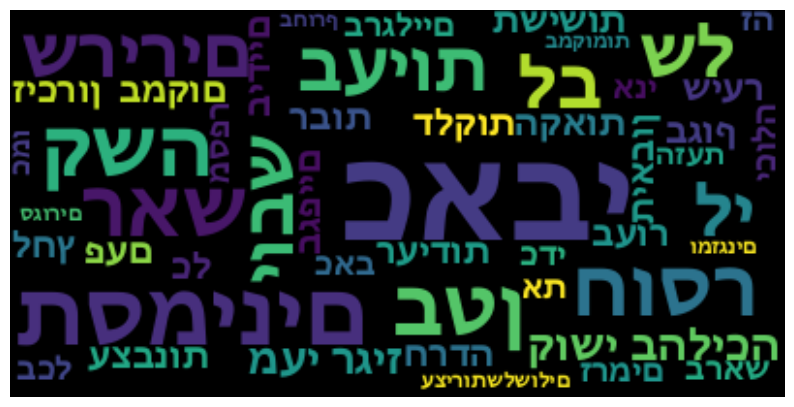

Word Cloud for Treatments:


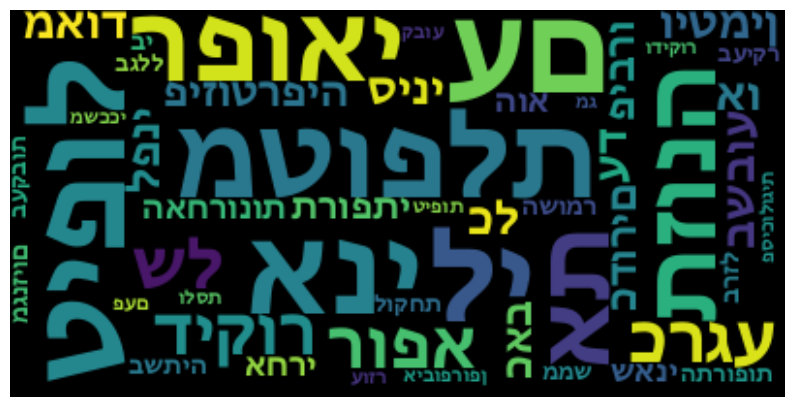

Word Cloud for Personal experience story:


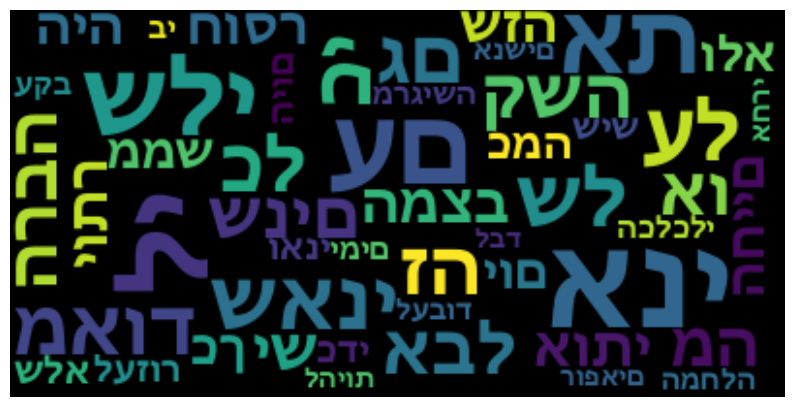

In [ ]:
stopwords_sheet = gc.open('stopwords').sheet1
# get_all_values gives a list of rows.
rows_stop_words = stopwords_sheet.get_all_values()
# Convert to a DataFrame and render.
df_stopwords = pd.DataFrame.from_records(rows_stop_words)
stopwords_lists = df.values.tolist()
stopwords_he = [x for list in stopwords_lists for x in list]

def word_cloud_from_list(ls, name):
  word_cloud_str=""
  for ls_str in ls:
    ls_words = ls_str.split()
    for word in ls_words:
      clean_word = ''.join(ch for ch in word if ch.isalnum())  # removing non-aphla characters from the word
      word_cloud_str+=" "+clean_word

  querywords = word_cloud_str.split()
  for word in querywords:
    if word in stopwords_he:
        querywords.remove(word)

  result = ' '.join(querywords)
  wordcloud = WordCloud(font_path='/content/drive/MyDrive/gishabd.ttf'
                        ,background_color="black",
                        max_font_size=70, max_words = 50).generate(get_display(result))

  fig = plt.figure()
  fig.set_figwidth(10) # set width
  fig.set_figheight(10) # set height

  # display the cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()
  wordcloud.to_file('/content/drive/MyDrive/Public Output Files for the Website/' + name +".png")

print("Word Cloud for Symptoms:")
# display the cloud for symptoms
word_cloud_from_list(fibro_additional_symptoms, "fibro_additional_symptoms")

print("Word Cloud for Treatments:")
# display the cloud for treatment
word_cloud_from_list(fibro_treatment_detail, "fibro_treatment_detail")

print("Word Cloud for Personal experience story:")
# display the cloud for personal experience
word_cloud_from_list(fibro_pesonal_experience, "fibro_pesonal_experience")




## Sentiment Analysis

In [ ]:
#------------------------------------------------------ STOP WORDS
from nltk.corpus import stopwords #english stopwords
str_all_texts = ""
str_all_texts_clean_list = []
# sentiment analysis
for idx, line in enumerate(fibro_pesonal_experience):
      print(">>> ORIGINAL TEXT --------------------->")
      displayTextWrapped(line)
      clean_line_words_lemmatized = []
      clean_line_words_str = ""
      # translate the string
      result = translator.translate(line)
      print(">>> TRANSLATED TO ENGLISH  --------------------->")
      en_txt = result.text
      str_all_texts += ','+en_txt
      displayTextWrapped(en_txt)
      ####################################################################################
      print(">>> Emotion classification using NRC Lexicon  --------------------->")
      emotion = NRCLex(en_txt)
      print('\n', emotion.sentences)
      print('\n', emotion.affect_dict)
      print('\n', emotion.top_emotions)
      print(emotion.affect_frequencies.items())
      ####################################################################################
      #-------------------------------------------------------------------------- SENTIMENTS
      print(">>> SENTIMENTS ANALYSIS Of ENGLISH TEXT --------------------->")
      sentiment_en = sentiment.polarity_scores(result.text)
      ls_sentiment_en = sentiment_en.items()
      df_sentiment_en = pd.DataFrame(ls_sentiment_en)
      display(df_sentiment_en)

      # clean the string : keep words only - no numbers and no punctuation
      word_list = word_tokenize(result.text)
      for word in word_list:
        if word.isalpha():
            clean_line_words_str+=' '+word.lower()
      # lemmatize
      doc = sp(clean_line_words_str.strip())
      for token in doc:
          clean_line_words_lemmatized.append(token._.lemma())
      setOfWords=set(clean_line_words_lemmatized)        # make set - remove duplicates
      # removing stop words from the list
      stop_words = set(stopwords.words('english'))
      wordsFiltered = []
      for w in setOfWords:
          if w not in stop_words:
              wordsFiltered.append(w)
      print(">>> CLEAN LEMMATIZED SET TO PROCESS --------------------->")
      print(wordsFiltered)
      str_all_texts_clean_list = str_all_texts_clean_list + wordsFiltered
      print("===============================================================================")
# print(str_all_texts_clean_list)


>>> ORIGINAL TEXT --------------------->
	 החוויה היא שגם עם אבחון  רופאים מזלזלים בתסמינים, כשיש תסמין חדש לא בודקים לעומק כי זה "כנראה תסמין של אחת המחלות הכרוניות שלי", רופאים חדשים לא אוהבים לטפל בי כי אני חולה מורכבת ששמגיעה עם שאלות.. לרוב מנפנפים אותי עם תלונות על סימפטום חדש בטענה שזה
	 "חלק מהמחלות האחרות, כנראה".   חברים התרחקו כי אני כבר לא כמו פעם וזה קשה
>>> TRANSLATED TO ENGLISH  --------------------->
	 The experience is that even with the diagnosis of physicians disrespect the symptoms, when there is a new symptom not to check in depth because it is "probably a symptom of one of my chronic diseases", new doctors do not like to treat me because I am
	 a complex patient who comes with questions.On the grounds that it is "some of the other diseases, apparently."  Friends have moved away because i'm not like it is and it's hard
>>> Emotion classification using NRC Lexicon  --------------------->

 [Sentence("The experience is that even with the diagnosis of physicians disre

,0,1
0,neg,0.1240
1,neu,0.8390
2,pos,0.0360
3,compound,-0.6786


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['like', 'patient', 'treat', 'physician', 'hard', 'even', 'move', 'experience', 'one', 'friend', 'new', 'symptom', 'away', 'check', 'apparently', 'disrespect', 'diagnosis', 'ground', 'probably', 'disease', 'chronic', 'complex', 'doctor', 'come', 'depth']
>>> ORIGINAL TEXT --------------------->
	 המחלות מנעו ממני להשתלב בעבודה. עקב כך נעזרתי בהבטחת הכנסה שנים ארוכות. אני מסתירה את המחלה עקב יחס לא אוהד ופוסל. גם את מצבי הכלכלי אני מסתירה . סגרתי על מנעול ובריח את תחושותי ,כאביי , מצב רוחי, בחברה  כביכול אני משתדלת מאוד שלא ירגישו שכואב לי .
	 אני נמנעת מפגישות או בילוי בקולנוע. כי לשבת אין לי בעיה (בערך) אבל לקום זה כאב לא נורמלי ואני לא יכולה ליישר את הרגליים וללכת. אני נראיית מצוברחת ומזה אני לא יכולה להימנע. מדובר ביותר משני עשורים.ומי דלי מב.לאומימידו לא משגת הנאות רבות אז אנדים
	 מתרחקים. אין ספק ששילמתי מחיר גבוה.  חברתי,כלכלי,משפחתי,ותעסוקתי.מ
>>> TRANSLATED TO ENGLISH  --------------------->
	 The diseases prevented me 

,0,1
0,neg,0.1050
1,neu,0.8230
2,pos,0.0720
3,compound,-0.5826


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['lock', 'like', 'pain', 'economic', 'employment', 'result', 'straighten', 'ca', 'pay', 'wo', 'foot', 'suppose', 'try', 'prevent', 'look', 'many', 'society', 'disqualify', 'smell', 'entertainment', 'feeling', 'roughly', 'incorporate', 'income', 'family', 'meeting', 'mood', 'close', 'non', 'father', 'feel', 'help', 'hide', 'much', 'situation', 'get', 'disease', 'abnormal', 'due', 'avoid', 'high', 'secure', 'problem', 'two', 'accumulate']
>>> ORIGINAL TEXT --------------------->
	 חוסר הבנה, זמן רב בריצות מרופא לרופא, קשיים במציאת רופאים שאפשר לסמוך עליהם, קושי של החברה הקרובה לקבל את המצב, בדידות, קושי להחזיק כלכלה יציבה לאורך זמן בגלל תקופות קשות יותר.
>>> TRANSLATED TO ENGLISH  --------------------->
	 Lack of understanding, a long time in a doctor's run, difficulties in finding doctors who can be trusted, the difficulty of the upcoming society to accept the situation, loneliness, difficulty holding a stable economy over time 

,0,1
0,neg,0.2720
1,neu,0.5840
2,pos,0.1440
3,compound,-0.7178


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['upcoming', 'long', 'accept', 'run', 'lack', 'understand', 'loneliness', 'period', 'society', 'trust', 'much', 'difficulty', 'situation', 'time', 'economy', 'find', 'difficult', 'doctor', 'stable', 'hold']
>>> ORIGINAL TEXT --------------------->
	 תחושה שנפלטתי מהחברה, חיה חיים שאין להם קשר למציאות החיים של אנשים בני גילי. התמודדות יומיומית עם כאב ותשישות שלא נראים לעין, ללא תמיכה, וללא תקווה להחלמה. חרדה למצבי הכלכלי ההולך ומחמיר, דכאון מהסבל המתמשך, והימנעות מפעילויות ומכל טריגר שיכול להוביל
	 להתקף, גם אם מודבר בפעילות פיזית קלה וזניחה עבור אדם בריא. עיקר הסבל הוא במפגש עם החוץ, החברה שלא מבינה ולא מאמינה ורופאים שמזלזלים או מתנשאים על המטופלים. הפסקתי ללכת לרופאים כשהבנתי שהפגיעה הנפשית שלהם בי מזיקה יותר מכל תרומה שיוכלו לתת לי, בעיקר
	 כשאין באמת פתרונות אמת למחלה.
>>> TRANSLATED TO ENGLISH  --------------------->
	 A feeling that I was emitted from society, lives a life that has nothing to do with the reality of my age

,0,1
0,neg,0.2300
1,neu,0.7330
2,pos,0.0370
3,compound,-0.9809


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['ongoing', 'pain', 'could', 'give', 'go', 'depression', 'seizure', 'contribution', 'especially', 'disease', 'without', 'state', 'cope', 'support', 'underestimate', 'economic', 'activity', 'healthy', 'society', 'harmful', 'spend', 'unhealthy', 'life', 'physical', 'meeting', 'injury', 'nothing', 'lead', 'avoid', 'realize', 'light', 'doctor', 'believe', 'suffering', 'truth', 'even', 'negligible', 'reality', 'feeling', 'grow', 'outside', 'tower', 'trigger', 'emit', 'hope', 'live', 'understand', 'stopped', 'mental', 'company', 'exhaustion', 'much', 'solution']
>>> ORIGINAL TEXT --------------------->
	 אחד הדברים המשמעותיים ביותר בעיניי זו חווית ההלם, כי השתנתי בתוך זה, לפעמים אני עדיין מופתעת מזה שזה המצב שלי, זה מגיע בהבלחות קטנות, זה אמנם לא תופס הרבה מקום בחיים שלי, כי אני כ"כ מוגבלת כרגע שזאת לגמרי המציאות המוחלטת, אבל יש רגעים שעדיין מכה בי
	 מן תחושת פתע כזו, שאיך זה באמת המצב?. השתניתי בתוך זה, והמצב הרפואי מעצב אותי במידת 

,0,1
0,neg,0.0900
1,neu,0.8000
2,pos,0.1100
3,compound,0.9482


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['less', 'self', 'could', 'misunderstanding', 'shake', 'back', 'judge', 'ca', 'good', 'legal', 'attentive', 'try', 'affect', 'know', 'home', 'go', 'decision', 'alone', 'today', 'change', 'recruit', 'significant', 'explain', 'luck', 'happen', 'almost', 'presence', 'wrong', 'five', 'connection', 'constantly', 'fight', 'small', 'slowly', 'define', 'social', 'vacation', 'condition', 'embark', 'meet', 'butthere', 'sister', 'make', 'friendly', 'absolute', 'deteriorate', 'muchi', 'support', 'surprised', 'disappear', 'hard', 'spouse', 'calm', 'strong', 'journey', 'friend', 'worldview', 'addition', 'need', 'possible', 'life', 'physical', 'surprise', 'yes', 'government', 'way', 'ability', 'shock', 'year', 'whole', 'apply', 'people', 'accord', 'lucky', 'take', 'leave', 'complete', 'power', 'physically', 'two', 'come', 'anyone', 'deterioration', 'conduct', 'thing', 'strike', 'begin', 'traumatic', 'talk', 'really', 'one', 'sociable', 'many'

,0,1
0,neg,0.0410
1,neu,0.8780
2,pos,0.0820
3,compound,0.2505


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['prevention', 'crooked', 'long', 'fatigue', 'trip', 'seem', 'prevent', 'look', 'include', 'hour', 'sick', 'people', 'session', 'half', 'much', 'beyond', 'residence', 'recreation', 'staff', 'eye', 'medical']
>>> ORIGINAL TEXT --------------------->
	 חוסר אונים, כאב קבוע ומשתק, פחד לצאת מהבית, ריחוק מחברה
>>> TRANSLATED TO ENGLISH  --------------------->
	 Helplessness, permanent and paralyzed pain, fear of leaving home, remote
>>> Emotion classification using NRC Lexicon  --------------------->

 [Sentence("Helplessness, permanent and paralyzed pain, fear of leaving home, remote")]

 {'paralyzed': ['anger', 'fear', 'negative', 'sadness', 'surprise'], 'pain': ['fear', 'negative', 'sadness'], 'fear': ['anger', 'fear', 'negative']}

 [('fear', 0.2727272727272727), ('negative', 0.2727272727272727)]
dict_items([('fear', 0.2727272727272727), ('anger', 0.18181818181818182), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.09090909090

,0,1
0,neg,0.5780
1,neu,0.4220
2,pos,0.0000
3,compound,-0.8625


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['leave', 'pain', 'home', 'helplessness', 'remote', 'permanent', 'paralyzed', 'fear']
>>> ORIGINAL TEXT --------------------->
	 סובלת כבר 3 שנים, דבר הפוגע בי בשגרת היומיום הן בתיפקוד כמשפחה, בחיי החברה ובהיבט הכלכלי שדורש ממני הוצאות רבות על טיפולים ואמצעים להרגעת הכאבים.
>>> TRANSLATED TO ENGLISH  --------------------->
	 She has been suffering for 3 years, which offends me in daily routine are in functioning as a family, social life and economic aspect that requires many expenses on treatments and means to soothe the pain.
>>> Emotion classification using NRC Lexicon  --------------------->

 [Sentence("She has been suffering for 3 years, which offends me in daily routine are in functioning as a family, social life and economic aspect that requires many expenses on treatments and means to soothe the pain.")]

 {'suffering': ['disgust', 'fear', 'negative', 'sadness'], 'daily': ['anticipation'], 'routine': ['positive', 'trust

,0,1
0,neg,0.2140
1,neu,0.7290
2,pos,0.0570
3,compound,-0.7845


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['suffer', 'pain', 'economic', 'expense', 'many', 'require', 'aspect', 'soothe', 'family', 'life', 'daily', 'year', 'treatment', 'function', 'social', 'mean', 'offend', 'routine']
>>> ORIGINAL TEXT --------------------->
	 אני מרגישה שאני עובדת בשלל התסמונות שיש לי. כמעט ואין לי ימים שאני מרגישה בהם טוב ולכן כל יום הוא מאבק. אני עובדת במשרה יחסית תובענית למה שאני מסוגלת לתת כרגע וכמובן שיש עלי ביקורת, משהו שאני לא רגילה אליו, אני רגילה להיות עובדת מעולה אבל מאוד קשה
	 להישאר לעבוד שעות ארוכות עם כאב וקשה להישאר מרוכזת יום שלם כשלא ישנים טוב וסובלים מחוסר ריכוז. מבחינה כלכלית- אני מוציאה אלפי שקלים כל חודש על רופאים, פיזיותרפיה, כדורים חדשים שאולי יכולים לעזור, גישות חדשות שאולי יוכלו לעזור.. ממש חיה בשביל למצוא
	 פתרונות במקום פשוט לנשום קצת תוך כדי החיים האלו.
>>> TRANSLATED TO ENGLISH  --------------------->
	 I feel like I'm working in the many syndromes I have.I have almost no days when I feel good and so every day is a fig

,0,1
0,neg,0.1850
1,neu,0.7180
2,pos,0.0970
3,compound,-0.9045


>>> CLEAN LEMMATIZED SET TO PROCESS --------------------->
['suffer', 'work', 'every', 'worker', 'course', 'concentrated', 'demanding', 'like', 'pain', 'approach', 'good', 'great', 'lack', 'well', 'give', 'use', 'new', 'many', 'criticism', 'may', 'hour', 'spend', 'almost', 'ball', 'something', 'full', 'physical', 'thousand', 'right', 'shekel', 'relatively', 'feel', 'job', 'help', 'month', 'day', 'stay', 'syndrome', 'therapy', 'difficult', 'doctor', 'sleep']
>>> ORIGINAL TEXT --------------------->
	 ימים קשים ולילות ללא שינה .אני עם פיברו למעלה מ30 שנה למזלי ב20 שנה האחרונות אני עם בן זוג מכיל עוזר פיזית ונפשית וכלכלית.וילדים שעוזרים שצריך.אני משתדלת לא לתת למחלה לנהל לי את החיים אבל לצערי נוספו לי מחלות נוספות אפלה וסיוגרן שזה מאד קשה?יש יצים
	 ולילות שאני בבית קשה לאכול קשה לדבר. מטופלת בבלינסון סיוגרן. ושוב מה שעוזר לי כרגע זה  הנוביגל 150 בהמלצת רופא כאב לעייפות ותשישות. אינני מבינה למה לא מציעים את הכדור פלא הזה לכל חולי הפיברו. מלהיות מרוחה על הספה מרבית היום אני מצליחנ לתפקד לבש

TypeError: ignored

In [ ]:
# help functions for creating dataframes for figures
# count the repetitions for each item on the given list and returns new dictionary that contains the item and the repetition count
def word_count(mylist):
    counts = dict()
    for word in mylist:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts


In [ ]:
# running the emotion clasigication dictionary on "str_all_texts" = english text for --> sharing personal experience question
text_object = NRCLex(str_all_texts)
# result after running the clasigication on the text
data = text_object.raw_emotion_scores

emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
display(emotion_df.sort_values(by=['Emotion Count'], ascending=False))

fibro_fig_emotion_analysis = px.pie(emotion_df, values='Emotion Count', names='Emotion Classification', width = 600, height = 600, hole=.3, title="סיווג רגשות")
fibro_fig_emotion_analysis.show()
# py.iplot(fibro_fig_emotion_analysis, filename = 'fibro_fig_emotion_analysis')

# counting each word from the givel list "str_all_texts_clean_list" = english set of 'clean' list of words from --> sharing personal experience question
# getting the most commonly used words
count_dict = word_count(str_all_texts_clean_list)
count_list = count_dict.items()
df_words_emotions_reps = pd.DataFrame(count_list, columns = ['מילה', 'כמות חזרות'])

fibro_fig_words_emotions_reps = px.bar(df_words_emotions_reps.sort_values(by=['כמות חזרות'], ascending=False).head(20), x='מילה', y='כמות חזרות', width = 1000, height = 400, title="עשרים מילים השכיחות ביותר")
fibro_fig_words_emotions_reps.show()
# py.iplot(fibro_fig_words_emotions_reps, filename = 'fibro_fig_words_emotions_reps')





## General Statistics

In [ ]:
#-------------------------------------------------------------------------------
# creating lists (name , rating, amount)
ratings_doctors = ['במידה בינונית','במידה רבה','במידה רבה מאוד','לא רלוונטי','כלל לא מרוצה','במידה מועטה']
rating_symptoms = ['לא רלוונטי','בתדירות גבוהה מאוד','כלל לא','בתדירות בינונית','בתדירות נמוכה','בתדירות גבוהה']
rating_caretakers = ['כמעט תמיד','לעיתים קרובות','לעיתים','לעיתים רחוקות','אף פעם','לא רלוונטי']

doctors_list = []
all_symptoms_list = []
all_nurses_hmo_list = []
all_social_workers_list = []
all_national_insurance_list = []
all_social_worker_welfare_list = []

def df_name_rating_count_creating(dr_rating_list, name, list_type):
  copy_ratings_doctors = ratings_doctors.copy()
  copy_rating_symptoms = rating_symptoms.copy()
  copyrating_caretakers = rating_caretakers.copy()

  for row in list(dr_rating_list):
    if(list_type == "doctors"):
      if(row[0] in copy_ratings_doctors):
        new_element = (name,row[0],row[1])
        doctors_list.append(new_element)
        copy_ratings_doctors.remove(row[0])

    if(list_type == "symptoms"):
      if(row[0] in copy_rating_symptoms):
        new_element = (name,row[0],row[1])
        all_symptoms_list.append(new_element)
        copy_rating_symptoms.remove(row[0])

    if(list_type == "nurse_hmo"):
      if(row[0] in copyrating_caretakers):
        new_element = (name,row[0],row[1])
        all_nurses_hmo_list.append(new_element)
        copyrating_caretakers.remove(row[0])

    if(list_type == "social_workers"):
      if(row[0] in copyrating_caretakers):
        new_element = (name,row[0],row[1])
        all_social_workers_list.append(new_element)
        copyrating_caretakers.remove(row[0])

    if(list_type == "national_insurance"):
      if(row[0] in copyrating_caretakers):
        new_element = (name,row[0],row[1])
        all_national_insurance_list.append(new_element)
        copyrating_caretakers.remove(row[0])

    if(list_type == "social_worker_welfare"):
      if(row[0] in copyrating_caretakers):
        new_element = (name,row[0],row[1])
        all_social_worker_welfare_list.append(new_element)
        copyrating_caretakers.remove(row[0])

#-----------------------------------------------------------

    if(list_type == "doctors" and len(copy_ratings_doctors)>0):
      for element in copy_ratings_doctors:
        new_element2 = (name,element,0)
        doctors_list.append(new_element2)

    if(list_type == "symptoms" and len(copy_rating_symptoms)>0):
      for element in copy_rating_symptoms:
        new_element2 = (name,element,0)
        all_symptoms_list.append(new_element2)

    if(list_type == "nurse_hmo" and len(copyrating_caretakers)>0):
      for element in copyrating_caretakers:
        new_element2 = (name,element,0)
        all_nurses_hmo_list.append(new_element2)

    if(list_type == "social_workers" and len(copyrating_caretakers)>0):
      for element in copyrating_caretakers:
        new_element2 = (name,element,0)
        all_social_workers_list.append(new_element2)

    if(list_type == "national_insurance" and len(copyrating_caretakers)>0):
      for element in copyrating_caretakers:
        new_element2 = (name,element,0)
        all_national_insurance_list.append(new_element2)

    if(list_type == "social_worker_welfare" and len(copyrating_caretakers)>0):
      for element in copyrating_caretakers:
        new_element2 = (name,element,0)
        all_social_worker_welfare_list.append(new_element2)


In [ ]:
gender_list=[]
age_list=[]
region_list = []
city_or_vilage_list=[]
hmo_list=[]
are_you_diagnosed_list=[]
disease_list=[]
time_suffering_list=[]
time_until_diagnosis_list=[]
do_you_work_list=[]
recognized_disability_list=[]
disability_from_disease_list=[]
do_you_get_financial_suport_list=[]
worsening_social_family_situation_list=[]
worsening_financial_situation_list=[]
getting_treatment_list=[]
one_doctor_treatment_list=[]
treating_doctor_type_list=[]
family_doctor_rating_list=[]
#------------------------------- doctor rating
pain_doctor_rating_list=[]
neurologist_doctor_rating_list=[]
rheumatologist_doctor_rating_list=[]
gynecologist_doctor_rating_list=[]
psychiatrist_doctor_rating_list=[]
ear_nose_and_throat_doctor_rating_list=[]
cardiologist_doctor_rating_list=[]
blood_vessel_doctor_rating_list=[]
oncologist_doctor_rating_list=[]
orthopedist_doctor_rating_list=[]
mouth_and_jaw_doctor_rating_list=[]
gastroenterologist_doctor_rating_list=[]
liver_doctor_rating_list=[]
pulmonary_doctor_rating_list=[]
#--------------------------------------------
aother_doctor_treatmet_rating_list=[]
one_place_treatment_list=[]
in_support_group_list=[]
information_seorce_list=[]
#------------------------------- symptom rating
high_blood_pressure_symptom_list=[]
low_blood_pressure_symptom_list=[]
balance_symptom_list=[]
nausea_symptom_list=[]
weakness_symptom_list=[]
dizziness_symptom_list=[]
tiredness_symptom_list=[]
depression_symptom_list=[]
mood_swings_symptom_list=[]
pain_symptom_list=[]
sleep_disorders_symptom_list=[]
adhd_symptom_list=[]
#--------------------------------------------
wrong_diagnosis_list=[]
wrong_treatment_list=[]
cost_list=[]
#------------------------------- לגבי האחיות, האם חשת ובאיזו תדירות ?
contempt_nurse_hmo_list=[]
distrust_nurse_hmo_list=[]
anger_nurse_hmo_list=[]
condescension_nurse_hmo_list=[]
#------------------------------- לגבי העובדות הסוציאליות (בקופות החולים) , האם חשת ובאיזו תדירות ?
contempt_social_worker_list=[]
distrust_social_worker_list=[]
anger_social_worker_list=[]
condescension_social_worker_list=[]
#------------------------------- לגבי העובדות הסוציאליות (רווחה) , האם חשת ובאיזו תדירות ?
contempt_social_worker_welfare_list=[]
distrust_social_worker_welfare_list=[]
anger_social_worker_welfare_list=[]
condescension_social_worker_welfare_list=[]
#------------------------------- לגבי הביטוח הלאומי , האם חשת ובאיזו תדירות ?
contempt_national_insurance_list=[]
distrust_national_insurance_list=[]
anger_national_insurance_list=[]
condescension_national_insurance_list=[]

for idx, line in enumerate(fibfo_list_he):
    list_of_answers = []
    if(len(line[2])>0):
      gender_list.append(line[2]) # cell in col number 2 - gender
    if(len(line[3])>0):
      age_list.append(line[3]) # cell in col number 3 - age
    if(len(line[4])>0):
      region_list.append(line[4]) # cell in col number 4 - region
    if(len(line[5])>0):
      city_or_vilage_list.append(line[5]) # cell in col number 4 - city or vilage
    if(len(line[6])>0):
      hmo_list.append(line[6]) # cell in col number 6 - HMO
    if(len(line[7])>0):
      are_you_diagnosed_list.append(line[7]) # cell in col number 7 - are you diagnosed?
    if(len(line[8])>0):
      disease_list.append(line[8]) # cell in col number 8 - what illness?
    if(len(line[10])>0):
          time_suffering_list.append(line[10]) # cell in col number 10 time suffering
    if(len(line[11])>0):
          time_until_diagnosis_list.append(line[11]) # cell in col number 11 time until diagnosed
    if(len(line[12])>0):
          do_you_work_list.append(line[12]) # cell in col number 12 do you work
    if(len(line[13])>0):
          recognized_disability_list.append(line[13]) # cell in col number 13 recongnised as disable
    if(len(line[14])>0):
          disability_from_disease_list.append(line[14]) # cell in col number 14 do you have disability from th disease
    if(len(line[15])>0):
      do_you_get_financial_suport_list.append(line[15]) # cell in col number 15 do you get financial support
    if(len(line[16])>0):
      worsening_social_family_situation_list.append(line[16]) # cell in col number 16 did your family/cosial situation got worse
    if(len(line[17])>0):
      worsening_financial_situation_list.append(line[17]) # cell in col number 17 did your financial situation goy wors?
    if(len(line[18])>0):
      getting_treatment_list.append(line[18]) # cell in col number 17 are you treated?
    if(len(line[20])>0):
      one_doctor_treatment_list.append(line[20]) # cell in col number 20 does only one doctor treating you?
    if(len(line[21])>0):
      treating_doctor_type_list.append(line[21]) # cell in col number 21 is it a family doctor?
    if(len(line[22])>0):
      family_doctor_rating_list.append(line[22]) # cell in col number 22 rate family doctor
#--------------------------------------------------------------- doctors
    if(len(line[23])>0):
      pain_doctor_rating_list.append(line[23]) # cell in col number 23
    if(len(line[24])>0):
      neurologist_doctor_rating_list.append(line[24]) # cell in col number 24
    if(len(line[25])>0):
      rheumatologist_doctor_rating_list.append(line[25]) # cell in col number 25
    if(len(line[26])>0):
      gynecologist_doctor_rating_list.append(line[26]) # cell in col number 26
    if(len(line[27])>0):
      psychiatrist_doctor_rating_list.append(line[27]) # cell in col number 27
    if(len(line[28])>0):
      ear_nose_and_throat_doctor_rating_list.append(line[28]) # cell in col number 28
    if(len(line[29])>0):
      cardiologist_doctor_rating_list.append(line[29]) # cell in col number 29
    if(len(line[30])>0):
      blood_vessel_doctor_rating_list.append(line[30]) # cell in col number 30
    if(len(line[31])>0):
      oncologist_doctor_rating_list.append(line[31]) # cell in col number 31
    if(len(line[32])>0):
      orthopedist_doctor_rating_list.append(line[32]) # cell in col number 32
    if(len(line[33])>0):
      mouth_and_jaw_doctor_rating_list.append(line[33]) # cell in col number 33
    if(len(line[34])>0):
      gastroenterologist_doctor_rating_list.append(line[34]) # cell in col number 34
    if(len(line[78])>0):
      liver_doctor_rating_list.append(line[78]) # cell in col number 78
    if(len(line[79])>0):
      pulmonary_doctor_rating_list.append(line[79]) # cell in col number 79
#-------------------------------
    if(len(line[36])>0):
      aother_doctor_treatmet_rating_list.append(line[36]) # cell in col number 36 rate your treating doctor
    if(len(line[37])>0):
      one_place_treatment_list.append(line[37]) # cell in col number 37 is your treatment in one place?
    if(len(line[38])>0):
      in_support_group_list.append(line[38]) # cell in col number 38 are you taking part in any support groups
    if(len(line[39])>0):
      information_seorce_list.append(line[39]) # cell in col number 39 information sources
#--------------------------------------------------------------- symptoms
    if(len(line[41])>0):
          high_blood_pressure_symptom_list.append(line[41]) #  cell in col number 41
    if(len(line[42])>0):
          low_blood_pressure_symptom_list.append(line[42]) #  cell in col number 42
    if(len(line[43])>0):
          balance_symptom_list.append(line[43]) #  cell in col number 43
    if(len(line[44])>0):
          nausea_symptom_list.append(line[44]) #  cell in col number 44
    if(len(line[45])>0):
          weakness_symptom_list.append(line[45]) #  cell in col number 45
    if(len(line[46])>0):
          dizziness_symptom_list.append(line[46]) #  cell in col number 46
    if(len(line[47])>0):
          tiredness_symptom_list.append(line[47]) #  cell in col number 47
    if(len(line[48])>0):
          depression_symptom_list.append(line[48]) #  cell in col number 48
    if(len(line[49])>0):
          mood_swings_symptom_list.append(line[49]) #  cell in col number 49
    if(len(line[50])>0):
          pain_symptom_list.append(line[50]) #  cell in col number 50
    if(len(line[51])>0):
          sleep_disorders_symptom_list.append(line[51]) #  cell in col number 51
    if(len(line[52])>0):
          adhd_symptom_list.append(line[52]) #  cell in col number 52
#------------------------------- לגבי האחיות, האם חשת ובאיזו תדירות ?
    if(len(line[55])>0):
          contempt_nurse_hmo_list.append(line[55]) #  cell in col number 55
    if(len(line[56])>0):
          distrust_nurse_hmo_list.append(line[56]) #  cell in col number 56
    if(len(line[57])>0):
          anger_nurse_hmo_list.append(line[57]) #  cell in col number 57
    if(len(line[58])>0):
          condescension_nurse_hmo_list.append(line[58]) #  cell in col number 57
#------------------------------- לגבי העובדות הסוציאליות (בקופות החולים) , האם חשת ובאיזו תדירות ?
    if(len(line[59])>0):
          contempt_social_worker_list.append(line[59]) #  cell in col number 59
    if(len(line[60])>0):
          distrust_social_worker_list.append(line[60]) #  cell in col number 60
    if(len(line[61])>0):
          anger_social_worker_list.append(line[61]) #  cell in col number 61
    if(len(line[62])>0):
          condescension_social_worker_list.append(line[62]) #  cell in col number 62
#------------------------------- לגבי העובדות הסוציאליות (רווחה) , האם חשת ובאיזו תדירות ?
    if(len(line[63])>0):
          contempt_social_worker_welfare_list.append(line[63]) #  cell in col number 63
    if(len(line[64])>0):
          distrust_social_worker_welfare_list.append(line[64]) #  cell in col number 64
    if(len(line[65])>0):
          anger_social_worker_welfare_list.append(line[65]) #  cell in col number 65
    if(len(line[66])>0):
          condescension_social_worker_welfare_list.append(line[66]) #  cell in col number 66
#------------------------------- לגבי הביטוח הלאומי , האם חשת ובאיזו תדירות ?
    if(len(line[67])>0):
          contempt_national_insurance_list.append(line[67]) #  cell in col number 67
    if(len(line[68])>0):
          distrust_national_insurance_list.append(line[68]) #  cell in col number 68
    if(len(line[69])>0):
          anger_national_insurance_list.append(line[69]) #  cell in col number 69
    if(len(line[70])>0):
          condescension_national_insurance_list.append(line[70]) #  cell in col number 70
#-------------------------------
    if(len(line[72])>0):
          wrong_diagnosis_list.append(line[72]) #  cell in col number 72 got wrong diagnosis?
    if(len(line[74])>0):
          wrong_treatment_list.append(line[74]) # cell in col number 74 got wrong treatment?
    if(len(line[76])>0):
          cost_list.append(line[76]) # cell in col number 76 expemces range


In [ ]:
#======================================================================== CHARTS
print("מספר המשתתפים בסקר על מחלת הפיברומיאלגיה :", len(fibfo_list_he))

print("פרטים אישיים")
#-------------------------------- gender statistics(col 2)
gender_count_dict = word_count(gender_list)
gender_count_list = gender_count_dict.items()
df_gender = pd.DataFrame(gender_count_list, columns = ['gender', 'reps'])
fig_gender = px.pie(df_gender, values='reps', names='gender', title="מהו מינך?")
fig_gender.show()
# py.iplot(fig_gender, filename = 'fibro_fig_gender')

#-------------------------------- age statistics (col 3)
age_count_dict = word_count(age_list)
age_count_list = age_count_dict.items()
df_age = pd.DataFrame(age_count_list, columns = ['age', 'reps'])
fig_age = px.pie(df_age, values='reps', names='age', title="מה גילך?")
fig_age.show()
# py.iplot(fig_age, filename = 'fibro_fig_age')

#-------------------------------- region statistics (col 4)
region_count_dict = word_count(region_list)
region_count_list = region_count_dict.items()
df_region = pd.DataFrame(region_count_list, columns = ['region', 'reps'])
fig_region = px.pie(df_region, values='reps', names='region', title="מהו איזור המגורים שלך?")
fig_region.show()
# py.iplot(fig_region, filename = 'fibro_fig_region')

#-------------------------------- city_or_vilage statistics (col 5) (pi-chart)
city_or_vilage_count_dict = word_count(city_or_vilage_list)
city_or_vilage_count_list = city_or_vilage_count_dict.items()
df_city_or_vilage = pd.DataFrame(city_or_vilage_count_list, columns = ['city_or_vilage', 'reps'])
fig_city_or_vilage = px.pie(df_city_or_vilage, values='reps', names='city_or_vilage', title="האם את מתגוררת בעיר\\יישוב עירוני\\ייישוב כפרי?")
fig_city_or_vilage.show()
# py.iplot(fig_city_or_vilage, filename = 'fibro_fig_city_or_vilage')

#-------------------------------- HMO statistics (col 6) (pi-chart)
hmo_count_dict = word_count(hmo_list)
hmo_count_list = hmo_count_dict.items()
df_hmo = pd.DataFrame(hmo_count_list, columns = ['hmo', 'reps'])
fig_hmo = px.pie(df_hmo, values='reps', names='hmo', title="לאיזה קופת חולים הנך משתייכת?")
fig_hmo.show()
# py.iplot(fig_hmo, filename = 'fibro_fig_hmo')

#-------------------------------- are_you_diagnosed statistics (col 7) (pi-chart)
are_you_diagnosed_count_dict = word_count(are_you_diagnosed_list)
are_you_diagnosed_count_list = are_you_diagnosed_count_dict.items()
df_are_you_diagnosed = pd.DataFrame(are_you_diagnosed_count_list, columns = ['are_you_diagnosed', 'reps'])
fig_are_you_diagnosed = px.pie(df_are_you_diagnosed, values='reps', names='are_you_diagnosed', title="האם אובחנת במחלה שקופה כלשהי?")
fig_are_you_diagnosed.show()
# py.iplot(fig_are_you_diagnosed, filename = 'fibro_fig_are_you_diagnosed')

#-------------------------------- disease_list statistics (col 8) (pi-chart)
disease_count_dict = word_count(disease_list)
disease_count_list = disease_count_dict.items()
df_disease = pd.DataFrame(disease_count_list, columns = ['disease_list', 'reps'])
fig_disease = px.pie(df_disease, values='reps', names='disease_list', title="מאיזו מחלה שקופה את סובלת? (אם יש לך יותר ממחלה אחת בחרי ב\"אחר\")")
fig_disease.show()
# py.iplot(fig_disease, filename = 'fibro_fig_disease')


print("אנא פרטי על המחלה שבה אובחנת")
#-------------------------------- time_suffering statistics (col 10) (pi-chart)
time_suffering_count_dict = word_count(time_suffering_list)
time_suffering_count_list = time_suffering_count_dict.items()
df_time_suffering = pd.DataFrame(time_suffering_count_list, columns = ['time_suffering', 'reps'])
fig_time_suffering = px.pie(df_time_suffering, values='reps', names='time_suffering', title="כמה זמן את סובלת מהמחלה?")
fig_time_suffering.show()
# py.iplot(fig_time_suffering, filename = 'fibro_fig_time_suffering')

#-------------------------------- time_until_diagnosis statistics (col 11) (pi-chart)
time_until_diagnosis_count_dict = word_count(time_until_diagnosis_list)
time_until_diagnosis_count_list = time_until_diagnosis_count_dict.items()
df_time_until_diagnosis = pd.DataFrame(time_until_diagnosis_count_list, columns = ['time_until_diagnosis', 'reps'])
fig_time_until_diagnosis = px.pie(df_time_until_diagnosis, values='reps', names='time_until_diagnosis', title="כמה זמן עבר מהרגע שאובחנה המחלה?")
fig_time_until_diagnosis.show()
# py.iplot(fig_time_until_diagnosis, filename = 'fibro_fig_time_until_diagnosis')

print("המצב חברתי-כלכלי")

#-------------------------------- do_you_work statistics (col 12) (pi-chart)
do_you_work_count_dict = word_count(do_you_work_list)
do_you_work_count_list = do_you_work_count_dict.items()
df_do_you_work = pd.DataFrame(do_you_work_count_list, columns = ['do_you_work', 'reps'])
fig_do_you_work = px.pie(df_do_you_work, values='reps', names='do_you_work', title="האם את עובדת?")
fig_do_you_work.show()
# py.iplot(fig_do_you_work, filename = 'fibro_fig_do_you_work')

#-------------------------------- recognized_disability statistics (col 13) (pi-chart)
recognized_disability_count_dict = word_count(recognized_disability_list)
recognized_disability_count_list = recognized_disability_count_dict.items()
df_recognized_disability = pd.DataFrame(recognized_disability_count_list, columns = ['recognized_disability', 'reps'])
fig_recognized_disability = px.pie(df_recognized_disability, values='reps', names='recognized_disability', title="האם את מוכרת כבעלת מוגבלות?")
fig_recognized_disability.show()
# py.iplot(fig_recognized_disability, filename = 'fibro_fig_recognized_disability')

#-------------------------------- disability_from_disease statistics (col 14) (pi-chart)
disability_from_disease_count_dict = word_count(disability_from_disease_list)
disability_from_disease_count_list = disability_from_disease_count_dict.items()
df_disability_from_disease = pd.DataFrame(disability_from_disease_count_list, columns = ['disability_from_disease', 'reps'])
fig_disability_from_disease = px.pie(df_disability_from_disease, values='reps', names='disability_from_disease',title="האם המוגבלות נובעת כתוצאה מהמחלה הנ\"ל?")
fig_disability_from_disease.show()
# py.iplot(fig_disability_from_disease, filename = 'fibro_fig_disability_from_disease')

#-------------------------------- do_you_get_financial_suport statistics (col 15) (bar chart horizontal)
# we get input list of lists separated by "," bcause ith's achekbox type (more than one option is available) --> we create a list of all the items.
new_financial_suport = []
for row in do_you_get_financial_suport_list:
  mylist = row.split(',')
  for word in mylist:
    new_financial_suport.append(word.lstrip())

do_you_get_financial_suport_count_dict = word_count(new_financial_suport)
do_you_get_financial_suport_count_list = do_you_get_financial_suport_count_dict.items()
df_do_you_get_financial_suport = pd.DataFrame(do_you_get_financial_suport_count_list, columns = [' ', 'כמות עונים'])
fig_do_you_get_financial_suport = px.bar(df_do_you_get_financial_suport, x='כמות עונים', y=' ', orientation='h', title="האם את מקבלת סיוע כלכלי ו/או קצבה?" )
fig_do_you_get_financial_suport.show()
# py.iplot(fig_do_you_get_financial_suport, filename = 'fibro_fig_do_you_get_financial_suport')

#-------------------------------- worsening_social_family_situation disability_from_disease statistics (col 16) (bar chart)
worsening_social_family_situation_count_dict = word_count(worsening_social_family_situation_list)
worsening_social_family_situation_count_list = worsening_social_family_situation_count_dict.items()
df_worsening_social_family_situation = pd.DataFrame(worsening_social_family_situation_count_list, columns = [' ', 'כמות עונים'])
fig_worsening_social_family_situation = px.bar(df_worsening_social_family_situation.sort_values(by=[' '], ascending=True), x=' ', y='כמות עונים', title="האם חלה הרעה במצבך החברתי, משפחתי בעקבות המחלה? (שימו לב למספרים ומשמעותם)")
fig_worsening_social_family_situation.show()
# py.iplot(fig_worsening_social_family_situation, filename = 'fibro_fig_worsening_social_family_situation')


#-------------------------------- worsening_financial_situation statistics (col 17) (bar chart)
worsening_financial_situation_count_dict = word_count(worsening_financial_situation_list)
worsening_financial_situation_count_list = worsening_financial_situation_count_dict.items()
df_worsening_financial_situation = pd.DataFrame(worsening_financial_situation_count_list, columns = [' ', 'כמות עונים'])
fig_worsening_financial_situation = px.bar(df_worsening_financial_situation.sort_values(by=[' '], ascending=True), x=' ', y='כמות עונים', title="האם חלה הרעה במצבך הכלכלי כתוצאה מהמחלה? (שימו לב למספרים ומשמעותם)")
fig_worsening_financial_situation.show()
# py.iplot(fig_worsening_financial_situation, filename = 'fibro_fig_worsening_financial_situation')

#-------------------------------- getting_treatment statistics (col 18) (pi-chart)
getting_treatment_count_dict = word_count(getting_treatment_list)
getting_treatment_count_list = getting_treatment_count_dict.items()
df_getting_treatment = pd.DataFrame(getting_treatment_count_list, columns = ['getting_treatment', 'reps'])
fig_getting_treatment = px.pie(df_getting_treatment, values='reps', names='getting_treatment', title="האם את מטופלת במחלה מבחינה רפואית? (במידה והטיפול אלטרנטיבי, אנא בחרי ב\"אחר\")")
fig_getting_treatment.show()
# py.iplot(fig_getting_treatment, filename = 'fibro_fig_getting_treatment')

print("פירוט אודות הטיפול")

#-------------------------------- one_doctor_treatment statistics (col 20) (pi-chart)
one_doctor_treatment_count_dict = word_count(one_doctor_treatment_list)
one_doctor_treatment_count_list = one_doctor_treatment_count_dict.items()
df_one_doctor_treatment = pd.DataFrame(one_doctor_treatment_count_list, columns = ['one_doctor_treatment', 'reps'])
fig_one_doctor_treatment = px.pie(df_one_doctor_treatment, values='reps', names='one_doctor_treatment', title="האם את מטופלת אצל רופא אחד ?")
fig_one_doctor_treatment.show()
# py.iplot(fig_one_doctor_treatment, filename = 'fibro_fig_one_doctor_treatment')

#-------------------------------- treating_doctor_type statistics (col 21) (pi-chart)
treating_doctor_type_count_dict = word_count(treating_doctor_type_list)
treating_doctor_type_count_list = treating_doctor_type_count_dict.items()
df_treating_doctor_type = pd.DataFrame(treating_doctor_type_count_list, columns = ['treating_doctor_type', 'reps'])
fig_treating_doctor_type = px.pie(df_treating_doctor_type, values='reps', names='treating_doctor_type', title="האם הרופא המטפל הוא רופא המשפחה ו\או רופא מקצועי?")
fig_treating_doctor_type.show()
# py.iplot(fig_treating_doctor_type, filename = 'fibro_fig_treating_doctor_type')

#-------------------------------- family_doctor_rating statistics (col 22)
family_doctor_rating_count_dict = word_count(family_doctor_rating_list)
family_doctor_rating_count_list = family_doctor_rating_count_dict.items()
df_family_doctor_rating = pd.DataFrame(family_doctor_rating_count_list, columns = ['דרוג רופא משפחה', 'כמות עונים'])
fig_family_doctor_rating = px.bar(df_family_doctor_rating.sort_values(by=['דרוג רופא משפחה'], ascending=True), x='כמות עונים', y='דרוג רופא משפחה', color = 'דרוג רופא משפחה' ,orientation='h', title="אנא דרגי את שביעות רצונך מטיפולו שלך רופא המשפחה בהקשר למחלה שלך")
fig_family_doctor_rating.show()
# py.iplot(fig_family_doctor_rating, filename = 'fibro_fig_family_doctor_rating')

#-------------------------------------------------------------------- DOCTORS
pain_doctor_rating_count_dict = word_count(pain_doctor_rating_list)
pain_doctor_rating_count_list = pain_doctor_rating_count_dict.items()

neurologist_doctor_rating_count_dict = word_count(neurologist_doctor_rating_list)
neurologist_doctor_rating_count_list = neurologist_doctor_rating_count_dict.items()

rheumatologist_doctor_rating_count_dict = word_count(rheumatologist_doctor_rating_list)
rheumatologist_doctor_rating_count_list = rheumatologist_doctor_rating_count_dict.items()

gynecologist_doctor_rating_count_dict = word_count(gynecologist_doctor_rating_list)
gynecologist_doctor_rating_count_list = gynecologist_doctor_rating_count_dict.items()

psychiatrist_doctor_rating_count_dict = word_count(psychiatrist_doctor_rating_list)
psychiatrist_doctor_rating_count_list = psychiatrist_doctor_rating_count_dict.items()

ear_nose_and_throat_doctor_rating_count_dict = word_count(ear_nose_and_throat_doctor_rating_list)
ear_nose_and_throat_doctor_rating_count_list = ear_nose_and_throat_doctor_rating_count_dict.items()

cardiologist_doctor_rating_count_dict = word_count(cardiologist_doctor_rating_list)
cardiologist_doctor_rating_count_list = cardiologist_doctor_rating_count_dict.items()

blood_vessel_doctor_rating_count_dict = word_count(blood_vessel_doctor_rating_list)
blood_vessel_doctor_rating_count_list = blood_vessel_doctor_rating_count_dict.items()

oncologist_doctor_rating_count_dict = word_count(oncologist_doctor_rating_list)
oncologist_doctor_rating_count_list = oncologist_doctor_rating_count_dict.items()

orthopedist_doctor_rating_count_dict = word_count(orthopedist_doctor_rating_list)
orthopedist_doctor_rating_count_list = orthopedist_doctor_rating_count_dict.items()

mouth_and_jaw_doctor_rating_count_dict = word_count(mouth_and_jaw_doctor_rating_list)
mouth_and_jaw_doctor_rating_count_list = mouth_and_jaw_doctor_rating_count_dict.items()

gastroenterologist_doctor_rating_count_dict = word_count(gastroenterologist_doctor_rating_list)
gastroenterologist_doctor_rating_count_list = gastroenterologist_doctor_rating_count_dict.items()

liver_doctor_rating_count_dict = word_count(liver_doctor_rating_list)
liver_doctor_rating_count_list = liver_doctor_rating_count_dict.items()

pulmonary_doctor_rating_count_dict = word_count(pulmonary_doctor_rating_list)
pulmonary_doctor_rating_count_list = pulmonary_doctor_rating_count_dict.items()

df_name_rating_count_creating(pain_doctor_rating_count_list, "רופא/מומחה כאב" ,"doctors")
df_name_rating_count_creating(neurologist_doctor_rating_count_list, "נוירולוג" ,"doctors")
df_name_rating_count_creating(rheumatologist_doctor_rating_count_list, "ראומטולוג" ,"doctors")
df_name_rating_count_creating(gynecologist_doctor_rating_count_list, "גניקולוג" ,"doctors")
df_name_rating_count_creating(psychiatrist_doctor_rating_count_list, "פסיכולוג/פסיכיאטר" ,"doctors")
df_name_rating_count_creating(ear_nose_and_throat_doctor_rating_count_list, "אף אוזן וגרון" ,"doctors")
df_name_rating_count_creating(cardiologist_doctor_rating_count_list, "קרדיולוג (מרפאת לב)" ,"doctors")
df_name_rating_count_creating(blood_vessel_doctor_rating_count_list, "כלי דם" ,"doctors")
df_name_rating_count_creating(oncologist_doctor_rating_count_list, "אונקולוג" ,"doctors")
df_name_rating_count_creating(orthopedist_doctor_rating_count_list, "אורטופד" ,"doctors")
df_name_rating_count_creating(mouth_and_jaw_doctor_rating_count_list, "פה ולסת" ,"doctors")
df_name_rating_count_creating(gastroenterologist_doctor_rating_count_list, "גסטרואנטרולוג" ,"doctors")
df_name_rating_count_creating(liver_doctor_rating_count_list, "רופא כבד" ,"doctors")
df_name_rating_count_creating(pulmonary_doctor_rating_count_list, "רופא ריאות" ,"doctors")

df_doctor_ratings = pd.DataFrame (doctors_list, columns = ['שביעות רצון מטיפולם של הרופאים שטיפלו בהקשר למחלה','דרוג', 'כמות עונים'])
fig_doctor_ratings = px.histogram(df_doctor_ratings, x="שביעות רצון מטיפולם של הרופאים שטיפלו בהקשר למחלה", y="כמות עונים",
             color='דרוג', barmode='group',
             height=400)
fig_doctor_ratings.show()
# py.iplot(fig_doctor_ratings, filename = 'fibro_fig_doctor_ratings')

#-------------------------------------------------------------------------------
print("פירוט לגבי רופאים נוספים")

#-------------------------------- aother_doctor_treatmet_rating statistics (col 36)
aother_doctor_treatmet_rating_count_dict = word_count(aother_doctor_treatmet_rating_list)
aother_doctor_treatmet_rating_count_list = aother_doctor_treatmet_rating_count_dict.items()
df_aother_doctor_treatmet_rating = pd.DataFrame(aother_doctor_treatmet_rating_count_list, columns = ['דירוג רופא מטפל', 'כמות עונים'])
fig_aother_doctor_treatmet_rating = px.bar(df_aother_doctor_treatmet_rating.sort_values(by=['דירוג רופא מטפל'], ascending=True), x='כמות עונים', y='דירוג רופא מטפל', color = 'דירוג רופא מטפל', orientation='h',  title="אנא דרגי את שביעות רצונך מטיפולו של הרופא שטיפל בך בהקשר למחלה")
fig_aother_doctor_treatmet_rating.show()
# py.iplot(fig_aother_doctor_treatmet_rating, filename = 'fibro_fig_aother_doctor_treatmet_rating')

#-------------------------------- one_place_treatment statistics (col 37) (pi-chart)
one_place_treatment_count_dict = word_count(one_place_treatment_list)
one_place_treatment_count_list = one_place_treatment_count_dict.items()
df_one_place_treatment = pd.DataFrame(one_place_treatment_count_list, columns = ['one_place_treatment', 'reps'])
fig_one_place_treatment = px.pie(df_one_place_treatment, values='reps', names='one_place_treatment', title="האם הטיפול הרפואי שלך מרוכז במקום אחד (צוות /רופא / מרכז רפואי)")
fig_one_place_treatment.show()
# py.iplot(fig_one_place_treatment, filename = 'fibro_fig_one_place_treatment')

print("מידע ותמיכה")
#-------------------------------- in_support_group statistics (col 38) (pi-chart)
in_support_group_count_dict = word_count(in_support_group_list)
in_support_group_count_list = in_support_group_count_dict.items()
df_in_support_group = pd.DataFrame(in_support_group_count_list, columns = ['in_support_group', 'reps'])
fig_in_support_group = px.pie(df_in_support_group, values='reps', names='in_support_group', title="האם את משתתפת בקבוצת תמיכה כלשהי, הקשורה למחלה?")
fig_in_support_group.show()
# py.iplot(fig_in_support_group, filename = 'fibro_fig_in_support_group')

#-------------------------------- information_seorce statistics (col 39) (pi-chart)
information_seorce_count_dict = word_count(information_seorce_list)
information_seorce_count_list = information_seorce_count_dict.items()
df_information_seorce = pd.DataFrame(information_seorce_count_list, columns = ['information_seorce', 'reps'])
fig_information_seorce = px.pie(df_information_seorce, values='reps', names='information_seorce',title="האם נעזרת במקורות מידע רפואי על המחלה? (אתרי אינטרנט, קבוצות ייעודיות בפייסבוק או WhatsApp וכו'..)")
fig_information_seorce.show()
# py.iplot(fig_information_seorce, filename = 'fibro_fig_information_seorce')

print("תסמינים")

print("דרגי בבקשה את סוגי התסמינים ותדירותם")
#-------------------------------------------------------------------- SYMPTOMS

high_blood_pressure_symptom_count_dict = word_count(high_blood_pressure_symptom_list)
high_blood_pressure_symptom_count_list = high_blood_pressure_symptom_count_dict.items()

low_blood_pressure_symptom_count_dict = word_count(low_blood_pressure_symptom_list)
low_blood_pressure_symptom_count_list = low_blood_pressure_symptom_count_dict.items()

balance_symptom_count_dict = word_count(balance_symptom_list)
balance_symptom_count_list = balance_symptom_count_dict.items()

nausea_symptom_count_dict = word_count(nausea_symptom_list)
nausea_symptom_count_list = nausea_symptom_count_dict.items()

weakness_symptom_count_dict = word_count(weakness_symptom_list)
weakness_symptom_count_list = weakness_symptom_count_dict.items()

dizziness_symptom_count_dict = word_count(dizziness_symptom_list)
dizziness_symptom_count_list = dizziness_symptom_count_dict.items()

tiredness_symptom_count_dict = word_count(tiredness_symptom_list)
tiredness_symptom_count_list = tiredness_symptom_count_dict.items()

depression_symptom_count_dict = word_count(depression_symptom_list)
depression_symptom_count_list = depression_symptom_count_dict.items()

mood_swings_symptom_count_dict = word_count(mood_swings_symptom_list)
mood_swings_symptom_count_list = mood_swings_symptom_count_dict.items()

pain_symptom_count_dict = word_count(pain_symptom_list)
pain_symptom_count_list = pain_symptom_count_dict.items()

sleep_disorders_symptom_count_dict = word_count(sleep_disorders_symptom_list)
sleep_disorders_symptom_count_list = sleep_disorders_symptom_count_dict.items()

adhd_symptom_count_dict = word_count(adhd_symptom_list)
adhd_symptom_count_list = adhd_symptom_count_dict.items()

df_name_rating_count_creating(high_blood_pressure_symptom_count_list, "לחץ דם גבוה", "symptoms")
df_name_rating_count_creating(low_blood_pressure_symptom_count_list, "לחץ דם נמוך","symptoms")
df_name_rating_count_creating(balance_symptom_count_list, "שיווי משקל" ,"symptoms")
df_name_rating_count_creating(nausea_symptom_count_list, "בחילות" ,"symptoms")
df_name_rating_count_creating(weakness_symptom_count_list, "חולשה" ,"symptoms")
df_name_rating_count_creating(dizziness_symptom_count_list, "סחרחורת" ,"symptoms")
df_name_rating_count_creating(tiredness_symptom_count_list, "עייפות" ,"symptoms")
df_name_rating_count_creating(depression_symptom_count_list, "דיכאון" ,"symptoms")
df_name_rating_count_creating(mood_swings_symptom_count_list, "מצבי רוח משתנים" ,"symptoms")
df_name_rating_count_creating(pain_symptom_count_list, "כאבים" ,"symptoms")
df_name_rating_count_creating(sleep_disorders_symptom_count_list, "הפרעות שינה" ,"symptoms")
df_name_rating_count_creating(adhd_symptom_count_list, "הפרעות קשב וריכוז" ,"symptoms")

df_symptoms_ratings = pd.DataFrame (all_symptoms_list, columns = ['דירוג תסמינים','דרוג', 'כמות עונים'])
fig_symptoms_ratings = px.histogram(df_symptoms_ratings, x="דירוג תסמינים", y="כמות עונים",
             color='דרוג', barmode='group',
             height=400)
fig_symptoms_ratings.show()
# py.iplot(fig_symptoms_ratings, filename = 'fibro_fig_symptoms_ratings')

#-------------------------------------------------------------------------------
print("יחס המטפלים - אחיות, עובדות סוציאליות (רווחה), ביטוח לאומי")

#------------------------------- לגבי האחיות, האם חשת ובאיזו תדירות ?
contempt_nurse_hmo_count_dict = word_count(contempt_nurse_hmo_list)
contempt_nurse_hmo_count_list = contempt_nurse_hmo_count_dict.items()

distrust_nurse_hmo_count_dict = word_count(distrust_nurse_hmo_list)
distrust_nurse_hmo_count_list = distrust_nurse_hmo_count_dict.items()

anger_nurse_hmo_list_count_dict = word_count(anger_nurse_hmo_list)
anger_nurse_hmo_count_list = anger_nurse_hmo_list_count_dict.items()

condescension_nurse_hmo_list_count_dict = word_count(condescension_nurse_hmo_list)
condescension_nurse_hmo_count_list = condescension_nurse_hmo_list_count_dict.items()

df_name_rating_count_creating(contempt_nurse_hmo_count_list, "זלזול", "nurse_hmo")
df_name_rating_count_creating(distrust_nurse_hmo_count_list, "חוסר אמון", "nurse_hmo")
df_name_rating_count_creating(anger_nurse_hmo_count_list, "כעס", "nurse_hmo")
df_name_rating_count_creating(condescension_nurse_hmo_count_list, "התנשאות", "nurse_hmo")

df_nurses_hmo_ratings = pd.DataFrame (all_nurses_hmo_list, columns = ['לגבי האחיות, האם חשת ובאיזו תדירות ?','דרוג', 'כמות עונים'])
fig_nurses_hmo_ratings = px.histogram(df_nurses_hmo_ratings, x="לגבי האחיות, האם חשת ובאיזו תדירות ?", y="כמות עונים",
             color='דרוג', barmode='group',
             height=300)
fig_nurses_hmo_ratings.show()
# py.iplot(fig_nurses_hmo_ratings, filename = 'fibro_fig_nurses_hmo_ratings')

#------------------------------- לגבי העובדות הסוציאליות (בקופות החולים) , האם חשת ובאיזו תדירות ?
contempt_social_worker_count_dict = word_count(contempt_social_worker_list)
contempt_social_worker_count_list = contempt_social_worker_count_dict.items()

distrust_social_worker_count_dict = word_count(distrust_social_worker_list)
distrust_social_worker_count_list = distrust_social_worker_count_dict.items()

anger_social_worker_count_dict = word_count(anger_social_worker_list)
anger_social_worker_count_list = anger_social_worker_count_dict.items()

condescension_social_count_dict = word_count(condescension_social_worker_list)
condescension_social_count_list = condescension_social_count_dict.items()


df_name_rating_count_creating(contempt_social_worker_count_list, "זלזול", "social_workers")
df_name_rating_count_creating(distrust_social_worker_count_list, "חוסר אמון", "social_workers")
df_name_rating_count_creating(anger_social_worker_count_list, "כעס", "social_workers")
df_name_rating_count_creating(condescension_social_count_list, "התנשאות", "social_workers")


df_social_workers_ratings = pd.DataFrame (all_social_workers_list, columns = ['לגבי העובדות הסוציאליות (בקופות החולים) , האם חשת ובאיזו תדירות ?','דרוג', 'כמות עונים'])
fig_social_workers_ratings = px.histogram(df_social_workers_ratings, x="לגבי העובדות הסוציאליות (בקופות החולים) , האם חשת ובאיזו תדירות ?", y="כמות עונים",
             color='דרוג', barmode='group',
             height=300)
fig_social_workers_ratings.show()
# py.iplot(fig_social_workers_ratings, filename = 'fibro_fig_social_workers_ratings')

#------------------------------- לגבי העובדות הסוציאליות (רווחה) , האם חשת ובאיזו תדירות ?
# social_worker_welfare
contempt_social_worker_welfare_count_dict = word_count(contempt_social_worker_welfare_list)
contempt_social_worker_welfare_count_list = contempt_social_worker_welfare_count_dict.items()

distrust_social_worker_welfare_count_dict = word_count(distrust_social_worker_welfare_list)
distrust_social_worker_welfare_count_list = distrust_social_worker_welfare_count_dict.items()

anger_social_worker_welfare_count_dict = word_count(anger_social_worker_welfare_list)
anger_social_worker_welfare_count_list = anger_social_worker_welfare_count_dict.items()

condescension_social_worker_welfare_count_dict = word_count(condescension_social_worker_welfare_list)
condescension_social_worker_welfare_count_list = condescension_social_worker_welfare_count_dict.items()

df_name_rating_count_creating(contempt_social_worker_welfare_count_list, "זלזול", "social_worker_welfare")
df_name_rating_count_creating(distrust_social_worker_welfare_count_list, "חוסר אמון", "social_worker_welfare")
df_name_rating_count_creating(anger_social_worker_welfare_count_list, "כעס", "social_worker_welfare")
df_name_rating_count_creating(condescension_social_worker_welfare_count_list, "התנשאות", "social_worker_welfare")


df_social_worker_welfare_ratings = pd.DataFrame (all_social_worker_welfare_list, columns = ['לגבי העובדות הסוציאליות (רווחה) , האם חשת ובאיזו תדירות ?','דרוג', 'כמות עונים'])
fig_social_worker_welfare_ratings = px.histogram(df_social_worker_welfare_ratings, x="לגבי העובדות הסוציאליות (רווחה) , האם חשת ובאיזו תדירות ?", y="כמות עונים",
             color='דרוג', barmode='group',
             height=300)
fig_social_worker_welfare_ratings.show()
# py.iplot(fig_social_worker_welfare_ratings, filename = 'fibro_fig_social_worker_welfare_ratings')

#------------------------------- לגבי הביטוח הלאומי , האם חשת ובאיזו תדירות ?

contempt_national_insurance_count_dict = word_count(contempt_national_insurance_list)
contempt_national_insurance_count_list = contempt_national_insurance_count_dict.items()

distrust_national_insurance_count_dict = word_count(distrust_national_insurance_list)
distrust_national_insurance_count_list = distrust_national_insurance_count_dict.items()

anger_national_insurance_count_dict = word_count(anger_national_insurance_list)
anger_national_insurance_count_list = anger_national_insurance_count_dict.items()

condescension_national_insurance_count_dict = word_count(condescension_national_insurance_list)
condescension_national_insurance_count_list = condescension_national_insurance_count_dict.items()

df_name_rating_count_creating(contempt_national_insurance_count_list, "זלזול", "national_insurance")
df_name_rating_count_creating(distrust_national_insurance_count_list, "חוסר אמון", "national_insurance")
df_name_rating_count_creating(anger_national_insurance_count_list, "כעס", "national_insurance")
df_name_rating_count_creating(condescension_national_insurance_count_list, "התנשאות", "national_insurance")


df_national_insurance_ratings = pd.DataFrame (all_national_insurance_list, columns = ['לגבי הביטוח הלאומי , האם חשת ובאיזו תדירות ?','דרוג', 'כמות עונים'])
fig_national_insurance_ratings = px.histogram(df_national_insurance_ratings, x="לגבי הביטוח הלאומי , האם חשת ובאיזו תדירות ?", y="כמות עונים",
             color='דרוג', barmode='group',
             height=300)
fig_national_insurance_ratings.show()
# py.iplot(fig_national_insurance_ratings, filename = 'fibro_fig_national_insurance_ratings')

#-------------------------------- wrong_diagnosis statistics (col 72) (pi-chart)
wrong_diagnosis_count_dict = word_count(wrong_diagnosis_list)
wrong_diagnosis_count_list = wrong_diagnosis_count_dict.items()
df_wrong_diagnosis = pd.DataFrame(wrong_diagnosis_count_list, columns = ['wrong_diagnosis', 'reps'])
fig_wrong_diagnosis = px.pie(df_wrong_diagnosis, values='reps', names='wrong_diagnosis', title="האם קיבלת אבחונים שגויים ?")
fig_wrong_diagnosis.show()
# py.iplot(fig_wrong_diagnosis, filename = 'fibro_fig_wrong_diagnosis')

#-------------------------------- wrong_treatment statistics (col 74) (pi-chart)
wrong_treatment_count_dict = word_count(wrong_treatment_list)
wrong_treatment_count_list = wrong_treatment_count_dict.items()
df_wrong_treatment = pd.DataFrame(wrong_treatment_count_list, columns = ['wrong_treatment', 'reps'])
fig_wrong_treatment = px.pie(df_wrong_treatment, values='reps', names='wrong_treatment', title="האם קיבלת טיפולים שגויים?")
fig_wrong_treatment.show()
# py.iplot(fig_wrong_treatment, filename = 'fibro_fig_wrong_treatment')

print("עלויות טיפולים")
#-------------------------------- cost statistics (col 76) (pi-chart)
cost_count_dict = word_count(cost_list)
cost_count_list = cost_count_dict.items()
df_cost = pd.DataFrame(cost_count_list, columns = ['cost', 'reps'])
fig_cost = px.pie(df_cost, values='reps', names='cost', title="מהו טווח העלויות הכספיות החודשיות שלך, הקשורות למחלה?")
fig_cost.show()
# py.iplot(fig_cost, filename = 'fibro_fig_cost')




Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'כמות חזרות=%{x}<br>סוג תסמין=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 5,  5,  5,  5,  5,  5,  6,  6,  7,  8, 20, 21]),
              'xaxis': 'x',
              'y': array(['Headache', 'Concentration', 'Quality of life satisfaction',
                          'Memory impairment', 'Difficulty walking', 'Abdominal pain', 'Fatigue',
                          'Exhaustion', 'Sleep disorder', 'Suffer', 'Social isolation', 'Pain'],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': 

## Plotly Exporting

In [ ]:
# export to plotly
# ======================================================== Tagging
# py.iplot(fibro_fig_rslt_df_symptom, filename = 'fibro_fig_rslt_df_symptom')
# py.iplot(fibro_figrslt_df_treatment, filename = 'fibro_figrslt_df_treatment')
# py.iplot(fibro_fig_rslt_df_other, filename = 'fibro_fig_rslt_df_other')

# =============================================  Emotions Alylisis
# py.iplot(fibro_fig_words_emotions_reps, filename = 'fibro_fig_words_emotions_reps')
# py.iplot(fibro_fig_emotion_analysis, filename = 'fibro_fig_emotion_analysis')

# =============================================  Bigrams
# py.iplot(fibro_fig_bigrams, filename = 'fibro_fig_bigrams')

# ========================================================= General Statistics
# py.iplot(fig_gender, filename = 'fibro_fig_gender')
# py.iplot(fig_age, filename = 'fibro_fig_age')
# py.iplot(fig_region, filename = 'fibro_fig_region')
# py.iplot(fig_city_or_vilage, filename = 'fibro_fig_city_or_vilage')
# py.iplot(fig_hmo, filename = 'fibro_fig_hmo')
# py.iplot(fig_are_you_diagnosed, filename = 'fibro_fig_are_you_diagnosed')

# # py.iplot(fig_disease, filename = 'fibro_fig_disease')
# py.iplot(fig_time_suffering, filename = 'fibro_fig_time_suffering')
# py.iplot(fig_time_until_diagnosis, filename = 'fibro_fig_time_until_diagnosis')
# py.iplot(fig_do_you_work, filename = 'fibro_fig_do_you_work')
# py.iplot(fig_recognized_disability, filename = 'fibro_fig_recognized_disability')
# py.iplot(fig_disability_from_disease, filename = 'fibro_fig_disability_from_disease')

# py.iplot(fig_do_you_get_financial_suport, filename = 'fibro_fig_do_you_get_financial_suport')
# py.iplot(fig_worsening_social_family_situation, filename = 'fibro_fig_worsening_social_family_situation')
# py.iplot(fig_worsening_financial_situation, filename = 'fibro_fig_worsening_financial_situation')
# py.iplot(fig_getting_treatment, filename = 'fibro_fig_getting_treatment')
# py.iplot(fig_one_doctor_treatment, filename = 'fibro_fig_one_doctor_treatment')

# py.iplot(fig_treating_doctor_type, filename = 'fibro_fig_treating_doctor_type')
# py.iplot(fig_family_doctor_rating, filename = 'fibro_fig_family_doctor_rating')
# py.iplot(fig_doctor_ratings, filename = 'fibro_fig_doctor_ratings')

# py.iplot(fig_aother_doctor_treatmet_rating, filename = 'fibro_fig_aother_doctor_treatmet_rating')
# py.iplot(fig_one_place_treatment, filename = 'fibro_fig_one_place_treatment')
# py.iplot(fig_in_support_group, filename = 'fibro_fig_in_support_group')
# py.iplot(fig_information_seorce, filename = 'fibro_fig_information_seorce')
# py.iplot(fig_symptoms_ratings, filename = 'fibro_fig_symptoms_ratings')

# py.iplot(fig_nurses_hmo_ratings, filename = 'fibro_fig_nurses_hmo_ratings')
# py.iplot(fig_social_workers_ratings, filename = 'fibro_fig_social_workers_ratings')
# py.iplot(fig_social_worker_welfare_ratings, filename = 'fibro_fig_social_worker_welfare_ratings')
# py.iplot(fig_national_insurance_ratings, filename = 'fibro_fig_national_insurance_ratings')

# py.iplot(fig_wrong_treatment, filename = 'fibro_fig_wrong_treatment')
# py.iplot(fig_wrong_diagnosis, filename = 'fibro_fig_wrong_diagnosis')
# py.iplot(fig_cost, filename = 'fibro_fig_cost')


